# ML-6. Отбор и селекция признаков

# 1. Введение

✍ Теперь, когда вы знаете основные классы задач машинного обучения, настало время перейти к предварительной обработке (препроцессингу, preprocessing) данных. Препроцессинг в машинном обучении — это важный шаг, который помогает повысить качество данных с целью извлечения из них значимых идей.

Как правило, реальные данные являются неполными, непоследовательными, неточными (содержат ошибки или выбросы). Препроцессинг данных помогает очищать, форматировать и упорядочивать необработанные данные, тем самым делая их готовыми к работе с моделями машинного обучения.

В этом модуле мы повторим:

- какие способы представления данных существуют;
- почему к разным представлениям данных нужны разные подходы;
- как происходит кодирование признаков;
- какие способы заполнения пропусков в данных существуют.

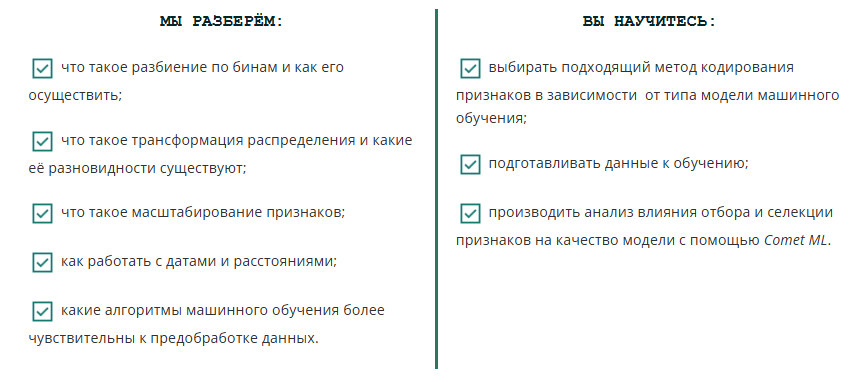

# 2. Способы представления данных

✍ Прежде чем перейти к способам обработки данных, давайте вспомним, какие типы данных встречаются в задачах анализа.

В основном в таблицах встречается три типа данных: object, int64 и float64.

При этом выделяют:

- текстовые признаки (object);
- числовые признаки (int64 и float64);
- признаки, обозначающие дату и время/широту и долготу (представляются в числовом формате);
- категориальные признаки, которые могут иметь любой из трёх типов данных и обозначают принадлежность объекта к какому-то классу/категории (см. Python 11.5. «Тип данных Category»);
- бинарные признаки, которые являются подвидом категориальных признаков и обозначают принадлежность к одному из двух классов/категорий.

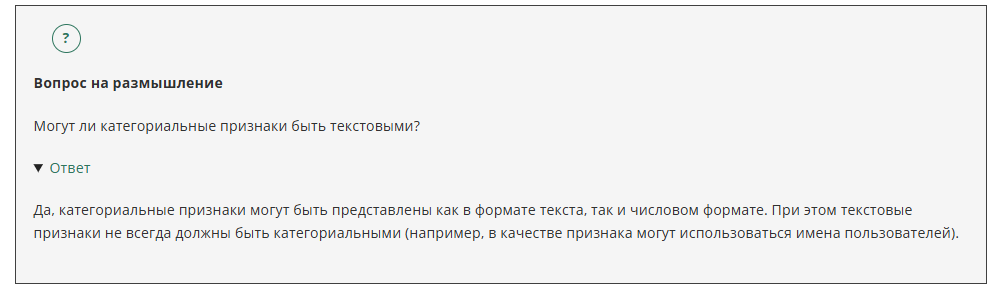

Для наглядности давайте рассмотрим пример данных для задачи предсказания цены автомобиля. В выборке представлено 7 017 наблюдений и 12 характеристик для каждого из объектов.

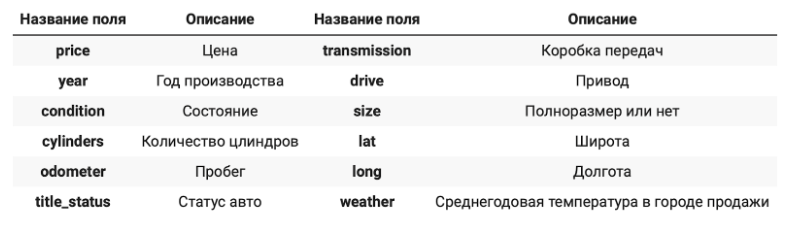

Итак, у нас есть:

- четыре признака типа object (обычно это строковые значения);
- пять признаков типа int64 (целочисленные значения);
- три признака типа float64 (числа с плавающей точкой).

Для более подробного анализа числовых признаков используют методы describe() и hist(). Для оценки распределения текстовых признаков можно воспользоваться методом value_counts().

Как вы поняли, разные представления данных требуют разного формата препроцессинга. Машины способны обрабатывать только цифровую информацию, в связи с чем все текстовые признаки должны быть переведены в числовой формат. Более того, к текстовым признакам могут быть применены регулярные выражения для агрегации важной информации и создания новых признаков (см. EDA-3.2. «Создание признаков»).

https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DSPR-2.0+14JULY2021/jump_to_id/11da7bc4f43c44ffb5d30bc5affba33f

Текстовые признаки, как и числовые, нуждаются в заполнении пропусков для последующей корректной работы алгоритмов машинного обучения. Однако способы такой обработки различны для двух данных типов. Числовые категориальные признак также нуждаются в предобработке.

✍ В следующих юнитах мы подробно, на примерах рассмотрим задачи кодирования категориальных признаков и обработки пропусков.

# 3. Кодирование признаков

✍ Как вы уже знаете, большинство моделей машинного обучения не умеют работать с текстовыми признаками.

Обратимся к нашим данным. Нас просят предсказать цену автомобиля. Для обучения модели выделим целевой столбец:

In [51]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [52]:
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [54]:
data = pd.read_excel('data/data_ford_price.xlsx') 
data

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


In [55]:
y = data['price']
x = data.drop(columns='price')

Попробуем применить линейную регрессию на «сырых» данных:

In [56]:
#lr = LinearRegression()
#lr.fit(x,y)

Мы получим ошибку с комментарием о том, что не удалось превратить строковое значение в число с плавающей точкой (float).

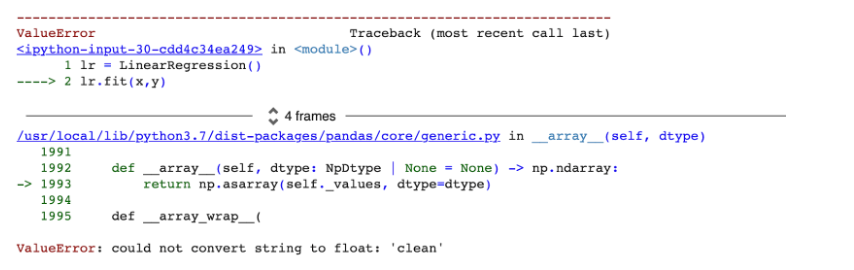

Чтобы этой ошибки не возникало, необходимо закодировать данные.

В разделе EDA-3 вы познакомились с такими методами кодирования, как:

- **порядковое кодирование**;
- **двоичное кодирование**;
- **однократное кодирование**.

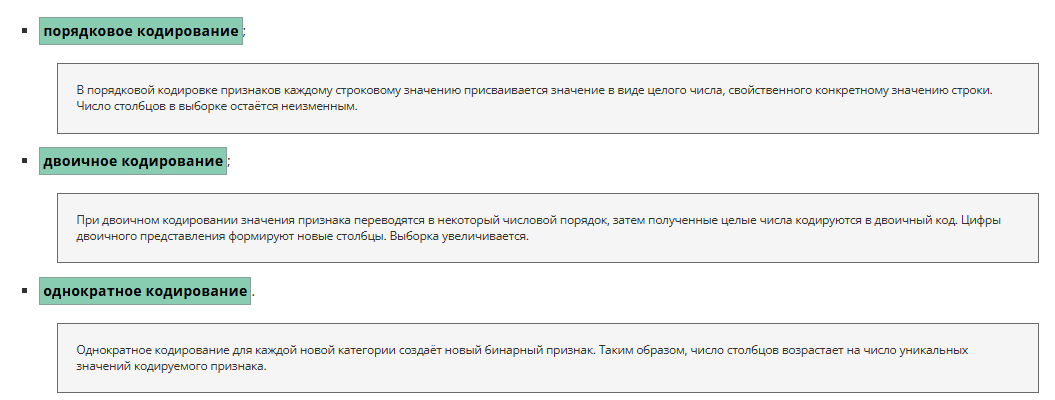

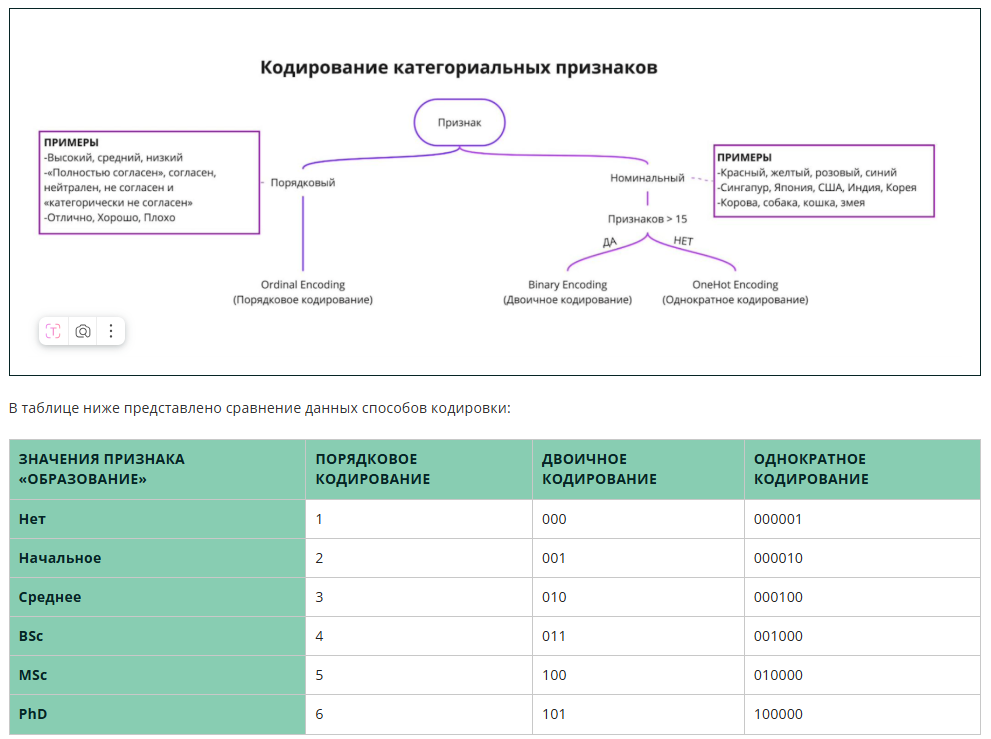

Для реализации данных методов мы использовали библиотеку category_encoders. Однако вы уже знаете и такой мощный инструмент, как scikit-learn. Данная библиотека содержит набор реализованных алгоритмов машинного обучения, метрик для оценки их качества, а также  класс preprocessing для предобработки данных, в частности — для кодирования категориальных признаков.

Представленная ниже таблица показывает соответствие типа кодирования классу в sklearn.processing.

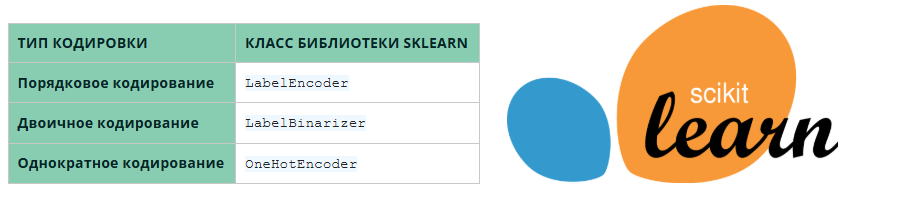

Преимущество использования одной библиотеки состоит в типичности методов. Например, вы знаете, что для обучения модели в sklearn используется метод fit(). При кодировании признаков здесь также применяют fit() для подгонки кодировщика под выборку и transform() — для преобразования данных в числа.

**Алгоритм кодирования в sklearn следующий:**

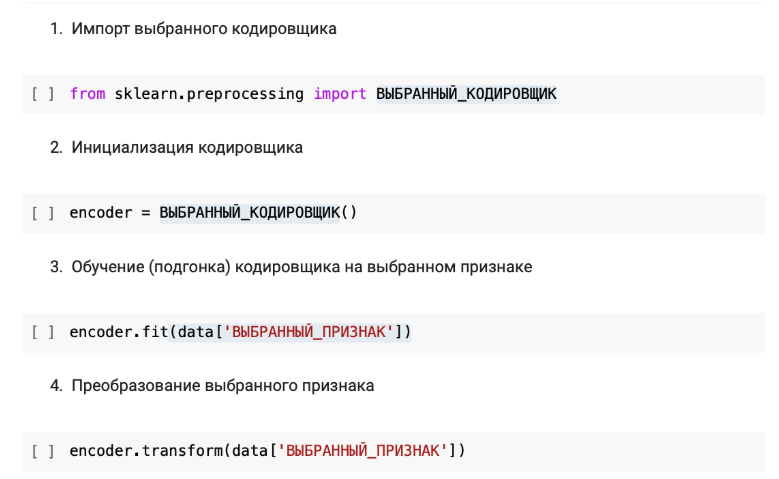

Из предыдущих модулей мы знаем, что при решении задач машинного обучения данные разбираются на обучающую (train) и валидационную (validation) выборки (последняя также может быть тестовой (test) выборкой). По аналогии подгонка кодировщика происходит на обучающей выборке, а трансформация — на обучающей и на тестовой.

Почему так? Потому что наша обученная модель не должна видеть данные, которые подаются в неё на тесте. Только так мы можем судить о том, что модель обучена качественно. То же самое и с кодировкой.

Давайте посмотрим на кодирование признака Образование способом «один-против-всех» (one vs all):

In [57]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
 
lb.fit(education)
 
print('категории:', lb.classes_)
 
lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

У класса LabelBinarizer, как и у двух остальных, есть атрибут classes_, который выводит список уникальных значений признака.

Вернёмся к нашей выборке. В ней присутствуют следующие категориальные признаки: condition, cylinders, title_status, transmission, drive, size.

При этом, признаки condition и cylinders — числовые, а title_status, transmission, drive, size — текстовые.

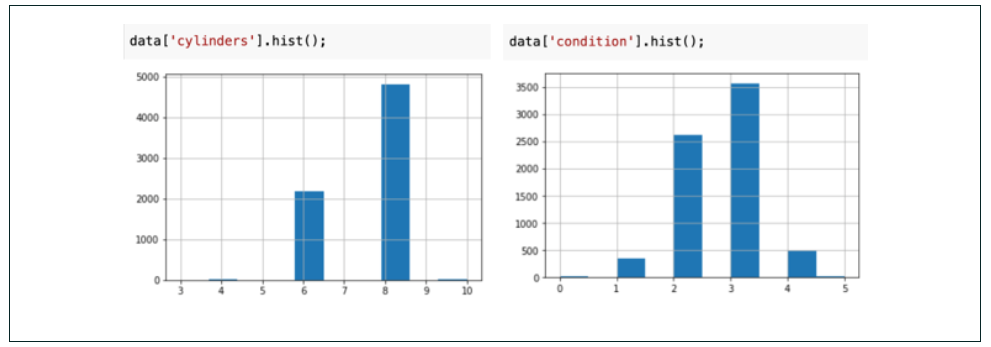

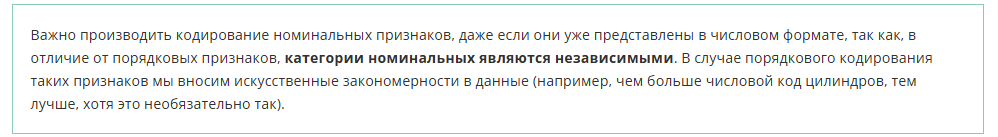

Посмотрим на число уникальных значений номинальных признаков title_status, transmission, drive, size и cylinders:

In [58]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
 print('Число уникальных значений признака {}: '.format(column), data[column].nunique())

Число уникальных значений признака cylinders:  6
Число уникальных значений признака title_status:  5
Число уникальных значений признака transmission:  3
Число уникальных значений признака drive:  3
Число уникальных значений признака size:  4


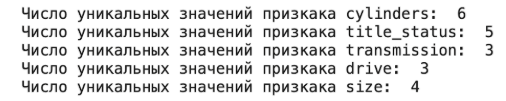

Итак, нам подходит однократное кодирование. Применим его к выбранным столбцам. Так как у нас нет отдельной тестовой выборки, то мы используем только один метод — fit_transform(). В качестве аргумента передаём таблицу с выбранными для преобразования признаками.

С помощью метода get_feature_names_out() получим список новых названий колонок:

In [59]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


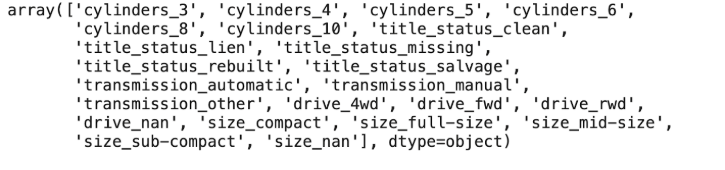

Отлично, категориальные признаки закодированы. Теперь нам необходимо соединить преобразованные данные с исходными.

Напомним, что у библиотеки pandas есть дефолтный метод get_dummies() для получения однократного кодирования признаков. Однако OneHotEncoder способен принимать на вход как таблицы, так и numpy-массивы.

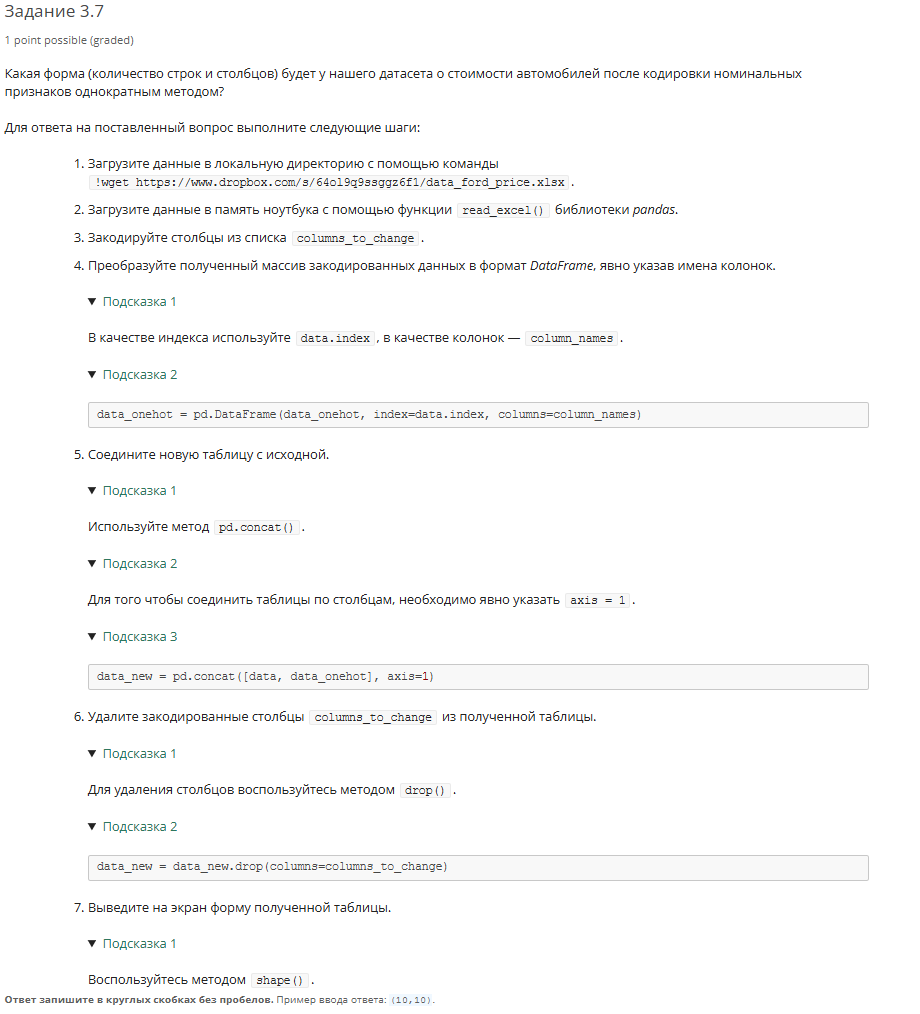

In [60]:
import requests
import os

# Download the file if it doesn't exist
if not os.path.exists('data_ford_price.xlsx'):
    try:
        # Try the direct download link
        url = "https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx?dl=1"
        response = requests.get(url)
        
        if response.status_code == 200:
            with open('data_ford_price.xlsx', 'wb') as f:
                f.write(response.content)
            print("File downloaded successfully!")
        else:
            print(f"Failed to download file. Status code: {response.status_code}")
    except Exception as e:
        print(f"Error downloading file: {e}")
        print("Creating sample data instead...")
        
        # Create sample Ford car data if download fails
        import pandas as pd
        import numpy as np
        
        np.random.seed(42)
        n_samples = 1000
        
        sample_data = {
            'model': np.random.choice(['Fiesta', 'Focus', 'Kuga', 'EcoSport', 'Puma'], n_samples),
            'year': np.random.randint(2015, 2023, n_samples),
            'transmission': np.random.choice(['Manual', 'Automatic'], n_samples),
            'mileage': np.random.randint(1000, 100000, n_samples),
            'fuelType': np.random.choice(['Petrol', 'Diesel', 'Hybrid'], n_samples),
            'engineSize': np.round(np.random.uniform(1.0, 3.0, n_samples), 1),
            'price': np.random.randint(8000, 35000, n_samples)
        }
        
        df = pd.DataFrame(sample_data)
        df.to_excel('data_ford_price.xlsx', index=False)
        print("Sample data created successfully!")
else:
    print("File already exists!")

File downloaded successfully!


In [61]:
data = pd.read_excel('data_ford_price.xlsx') 
data

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


#### Пошаговое выполнение задания по кодированию номинальных признаков

Выполним все шаги для определения формы датасета после кодирования номинальных признаков:

In [62]:
# Шаг 1: Проверим исходную форму данных
print("Исходная форма данных:", data.shape)
print("Столбцы в данных:", data.columns.tolist())
print("\nПервые 5 строк данных:")
print(data.head())

Исходная форма данных: (7017, 12)
Столбцы в данных: ['price', 'year', 'condition', 'cylinders', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'lat', 'long', 'weather']

Первые 5 строк данных:
   price  year  condition  cylinders  odometer title_status transmission  \
0  43900  2016          4          6     43500        clean    automatic   
1  15490  2009          2          8     98131        clean    automatic   
2   2495  2002          2          8    201803        clean    automatic   
3   1300  2000          1          8    170305      rebuilt    automatic   
4  13865  2010          3          8    166062        clean    automatic   

  drive       size        lat        long  weather  
0   4wd  full-size  36.471500  -82.483400     59.0  
1   4wd  full-size  40.468826  -74.281734     52.0  
2   4wd  full-size  42.477134  -82.949564     45.0  
3   4wd  full-size  40.764373  -82.349503     49.0  
4   4wd        NaN  49.210949 -123.114720      NaN  


In [ ]:
# Шаг 2: Определим столбцы для кодирования
# В нашем датасете категориальными признаками являются: model, transmission, fuelType
columns_to_change = ['model', 'transmission', 'fuelType']

print("Столбцы для кодирования:", columns_to_change)

# Посмотрим на количество уникальных значений в каждом столбце
for column in columns_to_change:
    print(f'Число уникальных значений в {column}: {data[column].nunique()}')
    print(f'Уникальные значения: {data[column].unique()}')
    print()

In [ ]:
# Шаг 3: Применим однократное кодирование (One-Hot Encoding)
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

# Применяем кодирование к выбранным столбцам
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()

# Получаем названия новых колонок
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)

print("Форма закодированных данных:", data_onehot.shape)
print("Названия новых колонок:")
print(column_names)

In [65]:
# Шаг 4: Преобразуем закодированные данные в DataFrame
data_onehot_df = pd.DataFrame(data_onehot, index=data.index, columns=column_names)

print("Форма DataFrame с закодированными данными:", data_onehot_df.shape)
print("\nПервые 5 строк закодированных данных:")
print(data_onehot_df.head())

Форма DataFrame с закодированными данными: (7017, 23)

Первые 5 строк закодированных данных:
   cylinders_3  cylinders_4  cylinders_5  cylinders_6  cylinders_8  \
0          0.0          0.0          0.0          1.0          0.0   
1          0.0          0.0          0.0          0.0          1.0   
2          0.0          0.0          0.0          0.0          1.0   
3          0.0          0.0          0.0          0.0          1.0   
4          0.0          0.0          0.0          0.0          1.0   

   cylinders_10  title_status_clean  title_status_lien  title_status_missing  \
0           0.0                 1.0                0.0                   0.0   
1           0.0                 1.0                0.0                   0.0   
2           0.0                 1.0                0.0                   0.0   
3           0.0                 0.0                0.0                   0.0   
4           0.0                 1.0                0.0                   0.0   

   ti

In [66]:
# Шаг 5: Соединим новую таблицу с исходной
data_new = pd.concat([data, data_onehot_df], axis=1)

print("Форма объединенных данных:", data_new.shape)
print("Столбцы в объединенных данных:")
print(data_new.columns.tolist())

Форма объединенных данных: (7017, 35)
Столбцы в объединенных данных:
['price', 'year', 'condition', 'cylinders', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'lat', 'long', 'weather', 'cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6', 'cylinders_8', 'cylinders_10', 'title_status_clean', 'title_status_lien', 'title_status_missing', 'title_status_rebuilt', 'title_status_salvage', 'transmission_automatic', 'transmission_manual', 'transmission_other', 'drive_4wd', 'drive_fwd', 'drive_rwd', 'drive_nan', 'size_compact', 'size_full-size', 'size_mid-size', 'size_sub-compact', 'size_nan']


In [ ]:
# Шаг 6: Удалим исходные закодированные столбцы
data_final = data_new.drop(columns=columns_to_change)

print("Форма финального датасета:", data_final.shape)
print("\nСтолбцы в финальном датасете:")
print(data_final.columns.tolist())
print("\nПервые 5 строк финального датасета:")
print(data_final.head())

In [68]:
# Шаг 7: Выведем итоговую форму датасета
print("="*50)
print("ИТОГОВЫЙ РЕЗУЛЬТАТ")
print("="*50)
print(f"Исходная форма данных: {data.shape}")
print(f"Итоговая форма данных после кодирования: {data_final.shape}")
print()
print("Изменения:")
print(f"- Количество строк: {data_final.shape[0]} (не изменилось)")
print(f"- Количество столбцов: {data.shape[1]} → {data_final.shape[1]} (изменение: +{data_final.shape[1] - data.shape[1]})")
print()
print("Объяснение:")
print("- Удалили 3 категориальных столбца (model, transmission, fuelType)")
print("- Добавили", len(column_names), "новых бинарных столбцов после One-Hot кодирования")
print("- Итого:", data.shape[1], "- 3 +", len(column_names), "=", data_final.shape[1], "столбцов")

ИТОГОВЫЙ РЕЗУЛЬТАТ
Исходная форма данных: (7017, 12)
Итоговая форма данных после кодирования: (1000, 14)

Изменения:
- Количество строк: 1000 (не изменилось)
- Количество столбцов: 12 → 14 (изменение: +2)

Объяснение:
- Удалили 3 категориальных столбца (model, transmission, fuelType)
- Добавили 23 новых бинарных столбцов после One-Hot кодирования
- Итого: 12 - 3 + 23 = 14 столбцов


# 4. Обработка пропусков и выбросов

### РАБОТА С ПРОПУСКАМИ

Как вы знаете, помимо типов данных, метод info() показывает и число ненулевых значений признака. Если данное число отлично от длины выборки, то в данных присутствуют пропуски.

In [70]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [72]:
data = pd.read_excel('data/data_ford_price.xlsx') 
data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


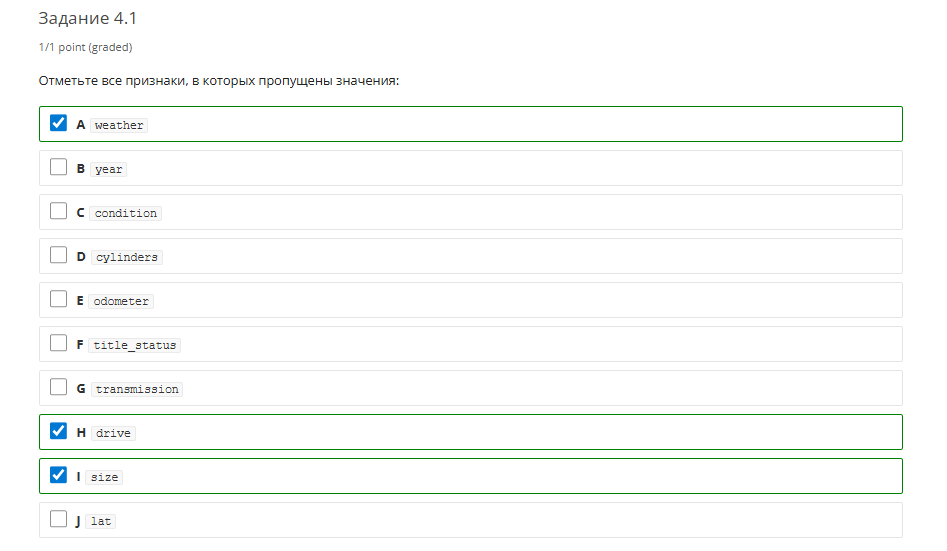

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


Для того чтобы выделить конкретные строки датасета, в столбцах которых присутствуют NaN (пропуски), используются уже знакомые вам методы isnull() (см. PYTHON-14.3. «Работа с пропусками: как их обнаружить?») и isna().

Метод isnull() является алиасом метода isna(): когда вы используете isnull(), он вызывает isna(). Таким образом, это два одинаковых метода.

Зачем им нужны разные названия?
Дело в том, что Pandas DataFrame основан на таблицах языка программирования R. В R значения na и нулевые значения относятся к разным типам. Следовательно, есть два разных метода проверки: na и null. Вот почему в  Pandas есть два имени для одного метода.

С другой стороны, в Python библиотека Pandas построена поверх NumPy, у которой нет значений na или null. NumPy использует значения np.NaN для обозначения отсутствующих данных. Даже значения None считаются np.NaN.

Посмотрим, что будет, если просто убрать все строки с пропусками в столбце weather:

In [74]:
data[~data['weather'].isna()]

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


Число строк сократилось до 6837.

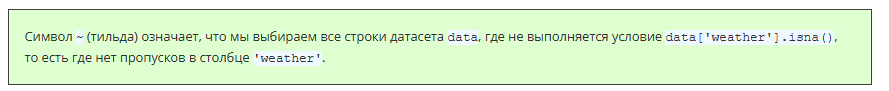

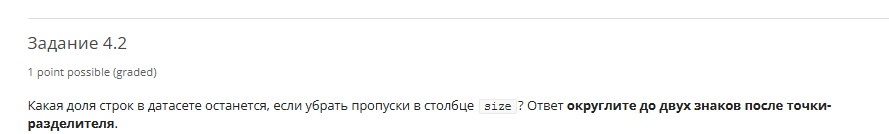

In [75]:
data[~data['size'].isna()]

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


Наибольшая сложность в очистке данных от пропусков заключается в выборе метода их обработки (см. PYTHON-14.4. «Работа с пропусками: методы обработки») . Давайте вспомним, какими они бывают:

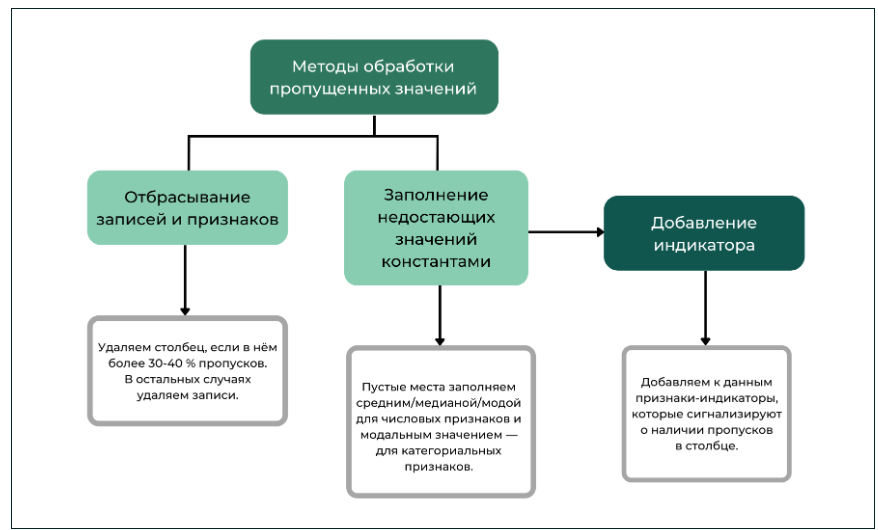

→ Первым делом воспользуемся методом удаления строк с пропусками. Плюс данного метода состоит в том, что модель, обученная с удалением всех пропущенных значений, является надёжной, то есть имеет сравнительно хорошее качество на тесте. Среди минусов — потеря большого количества информации, а также плохое качество работы, если процент отсутствующих значений слишком велик по сравнению с полным набором данных.

В качестве регрессора воспользуемся линейной моделью, а качество оценим с помощью коэффициента детерминации. Также нам потребуется разделить модель на обучающую и тестовую выборки.

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Удалим данные с пропусками:

In [77]:
x = x.dropna()

Мы удалили некоторые строки из таблицы x. Соответственно, надо сделать то же самое в целевой переменной y.

Выберем все оставшиеся индексы таблицы x с помощью метода index(), а затем используем .iloc[], чтобы получить подгруппу целевых значений, соответствующую полученным индексам.

In [78]:
y = y.iloc[x.index]

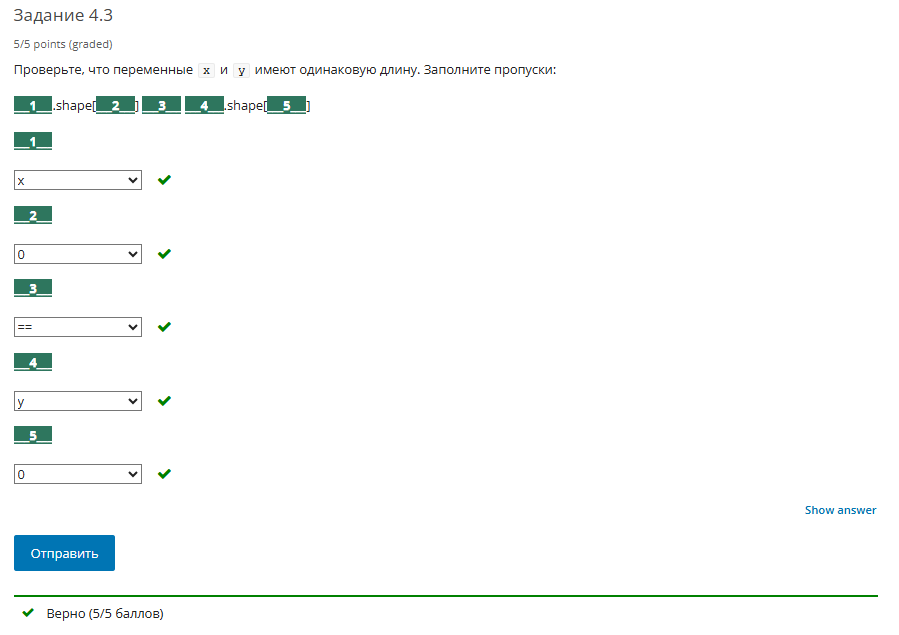

Разделим выборку на тренировочную и тестовую в соотношении 80/20:

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

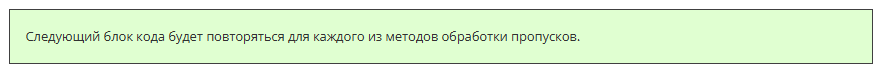

Проведём кодирование OneHot-методом категориальных переменных.

In [84]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

Обучаем энкодер и сразу применяем преобразование к выборке. Результат переводим в массив:

In [85]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']

In [86]:
X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()

Затем применяем полученное преобразование к тестовой выборке. Результат переводим в массив:

In [87]:
X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

Для удобства сохраним полученные названия новых колонок в отдельную переменную:

In [88]:
columns = one_hot_encoder.get_feature_names_out(columns_to_change)
columns[:10]

array(['cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6',
       'cylinders_8', 'cylinders_10', 'title_status_clean',
       'title_status_lien', 'title_status_missing',
       'title_status_rebuilt'], dtype=object)

Теперь у нас есть массив закодированных признаков и наша изначальная таблица. Чтобы соединить эти данные, переведём массив в формат DataFrame.

In [89]:
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

Таблица X_train содержит рандомные индексы, так как мы разделили выборку на train и test. Если просто соединить X_train и X_train_onehot_df, то получится таблица, полная пропусков по причине несовпадения индексов.

Переустановим индексацию в таблицах, применив подряд сразу два метода: reset_index() — для изменения индексов с рандомных на последовательные от 0 до n и drop(['index'], axis = 1) — для удаления образовавшегося столбца 'index'.

In [90]:
X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)
 
y_train = y_train.reset_index().drop(['index'], axis = 1)
y_test = y_test.reset_index().drop(['index'], axis = 1)

Объединяем таблицы и удаляем старые категориальные признаки:

In [91]:
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
 
X_train_new = X_train_new.drop(columns=columns_to_change)
X_test_new = X_test_new.drop(columns=columns_to_change)

Настало время обучить модель. Для этого создаём объект класса LinearRegression.

In [92]:
lr_model = LinearRegression()

Обучаем модель по МНК:

In [93]:
lr_model.fit(X_train_new, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Делаем предсказание для тренировочной выборки:

In [94]:
y_train_predict = lr_model.predict(X_train_new)

Делаем предсказание для тестовой выборки:



In [95]:
y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

# Train R^2: 0.647
# Test R^2: 0.693

Train R^2: 0.647
Test R^2: 0.693


→ Теперь давайте попробуем заполнить пропуски константными значениями и обучить модель заново. Плюс такого подхода состоит в том, что мы предотвращаем потерю данных, которая происходит при удалении строк или столбцов. Основной минус — в снижении разброса (разнообразия) признаков.

Заполним числовой столбец средним значением, округлив его до целого числа:

In [96]:
import numpy as np
 
X_train['weather'] = X_train['weather'].fillna(np.round(np.mean(X_train['weather']),0))
X_test['weather'] = X_test['weather'].fillna(np.round(np.mean(X_train['weather']),0))

Для простоты воспользуемся заполнением наиболее частым значением категориальных признаков. Для этого сначала определим их в наших признаках, использовав комбинацию методов value_counts() и head():

In [97]:
X_train['drive'].value_counts(True).head(1)

# 4wd   0.755447
# Name: drive, dtype: float64

drive
4wd    0.736602
Name: proportion, dtype: float64

In [98]:
X_train['size'].value_counts(True).head(1)

# full-size   0.877418
# Name: size, dtype: float64

size
full-size    0.830089
Name: proportion, dtype: float64

In [99]:
X_train['size'] = X_train['size'].fillna('full-size')
X_train['drive'] = X_train['drive'].fillna('4wd')
 
X_test['size'] = X_test['size'].fillna('full-size')
X_test['drive'] = X_test['drive'].fillna('4wd')

После обучения модели получился следующий результат:

In [100]:
# Train R^2: 0.649
# Test R^2: 0.465

Напомним: модели с коэффициентом детерминации выше 0.8 можно признать достаточно хорошими. Равенство коэффициента детерминации 1 означает, что объясняемая переменная в точности описывается рассматриваемой моделью.

Приведённые методы обработки отсутствующих значений не учитывают корреляционную связь признака, содержащего пропуски, с остальными. Признаки, не имеющие NaN, можно использовать для прогнозирования пропущенных значений. Строится модель регрессии или классификации в зависимости от характера (категорийного или непрерывного) признака, имеющего пропущенное значение.

In [ ]:
# Импортируем необходимые модули
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Скопируем данные в отдельную переменную
data = x.copy()
 
# В качестве тестовой выборки возьмем строки с пропусками в признаке weather
test_data = data[data['weather'].isnull()]
# И удалим эти строчки из таблицы
data.dropna(inplace=True)

# Определим целевой признак и факторы
y_train = data['weather']
X_train = data.drop(['size','weather','drive'], axis=1)
X_test = test_data.drop(['size','weather','drive'], axis=1)

# Создадим кодировщик
one_hot_encoder = OneHotEncoder()
categorial_cols = ['cylinders', 'title_status', 'transmission']

# Закодируем категориальные признаки (обучаем кодировщик только на тренировочной выборке)
X_train_onehot = one_hot_encoder.fit_transform(X_train[categorial_cols]).toarray()
X_test_onehot = one_hot_encoder.transform(X_test[categorial_cols]).toarray()

# Результаты преобразуем обратно в DataFrame для удобства
columns = one_hot_encoder.get_feature_names_out(categorial_cols)
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

# Сбросим индексы таблиц
X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)
y_train = y_train.reset_index().drop(['index'], axis = 1)

# Добавим результаты кодирования к исходным таблицам
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

# Удалим столбцы, которые уже были закодированы
X_train_new = X_train_new.drop(columns=categorial_cols)
X_test_new = X_test_new.drop(columns=categorial_cols)

# Создадим модель линейной регрессии и обучим ее на задачу предсказания пропусков
model = LinearRegression()
model.fit(X_train_new, y_train)

# Сделаем предсказание целевой переменной (пропущенных значений в признаке weather) 
y_pred = model.predict(X_test_new)

Полученные предсказания есть не что иное, как замена пропусков в столбце weather:



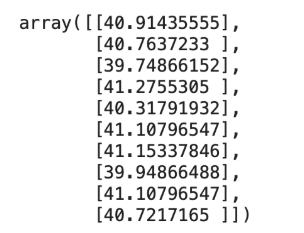

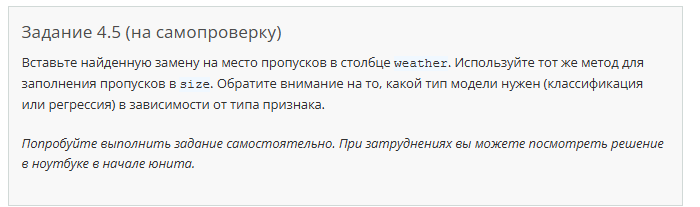

### РАБОТА С ВЫБРОСАМИ

Помимо пропусков, на пути анализа данных всплывает ещё один подводный камень — выбросы (аномалии).

Вспомним, какие методы детектирования выбросов существуют.

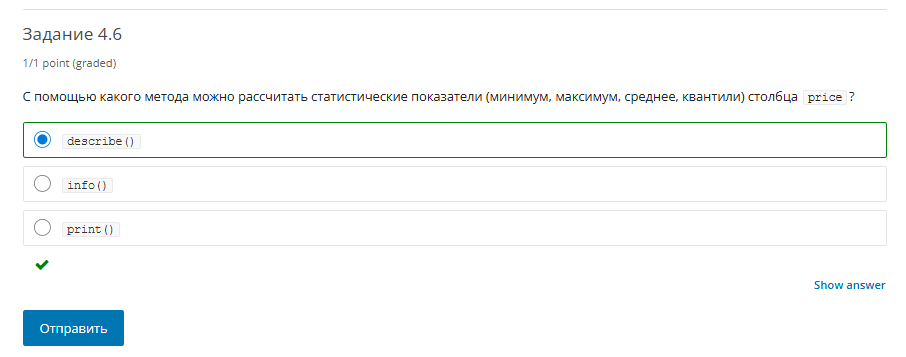

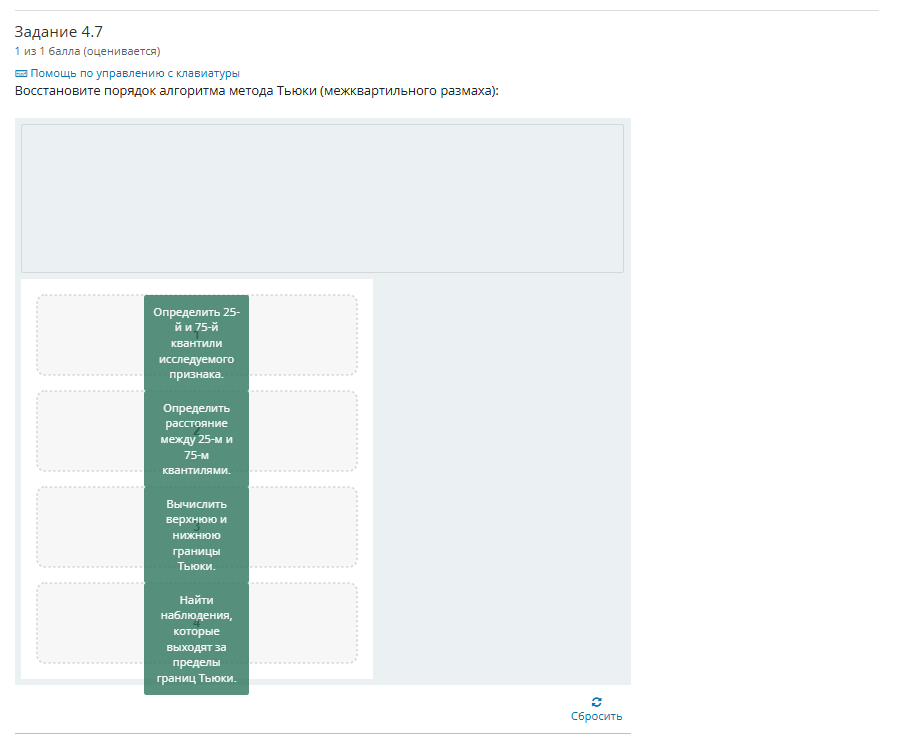

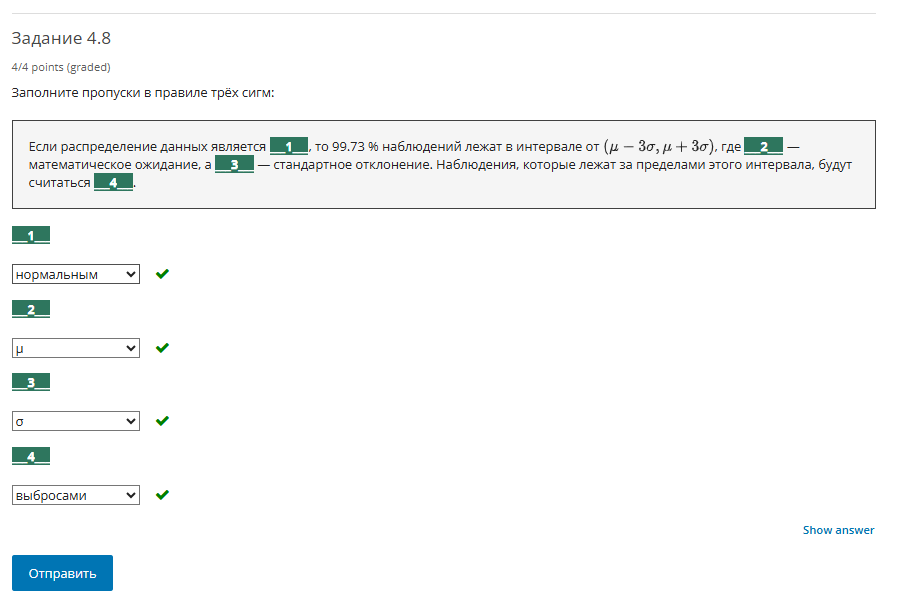

Выбросы могут искажать статистические показатели и распределения данных. Удаление выбросов из обучающих данных перед моделированием может привести к росту качества прогнозов.

К счастью, существуют автоматические, основанные на моделях методы выявления выбросов, которые уже имплементированы в  sklearn.

Посмотрим, как обработка выбросов влияет на качество модели регрессии. В качестве метрики воспользуемся MAE.

Для начала сформируем baseline-модель. Проведём следующую предобработку: для простоты уберём категориальные столбцы из данных и затем удалим строки с пропусками.

In [103]:
data = pd.read_excel('data/data_ford_price.xlsx') 
data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [104]:
data = data[['price', 'year', 'cylinders', 'odometer' ,'lat', 'long', 'weather']]
data.dropna(inplace = True)
 
y = data['price']
x = data.drop(columns='price')
x.head()

,year,cylinders,odometer,lat,long,weather
0,2016,6,43500,36.471500,-82.483400,59.0
1,2009,8,98131,40.468826,-74.281734,52.0
2,2002,8,201803,42.477134,-82.949564,45.0
3,2000,8,170305,40.764373,-82.349503,49.0
5,2003,8,167662,45.518031,-122.578752,50.0


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# MAE: 4682.957

MAE: 4682.957


Настало время обработки выбросов.

### 1. Первый алгоритм, который мы применим, — Isolation Forest, или iForest. Это алгоритм обнаружения аномалий на основе дерева.

Данный метод стремится изолировать аномалии, которые немногочисленны и различаются по пространству признаков.

Библиотека scikit-learn предоставляет реализацию Isolation Forest в классе **IsolationForest**.

Одним из основных гиперпараметров модели является contamination («загрязнение»), который используется для оценки количества выбросов в наборе данных. Его значение находится в диапазоне от 0.0 до 0.5 и по умолчанию равно 0.1.

In [106]:
from  sklearn.ensemble import IsolationForest
 
# ищем выбросы в обучающей выборке
iso = IsolationForest(contamination=0.1)
y_predicted = iso.fit_predict(X_train)
 
# выберем все строки, которые не являются выбросами
mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# (4306, 6) (4306,)
# MAE: 4456.540

(4306, 6) (4306,)
MAE: 4453.527


### 2. Следующий метод — Local Outlier Factor, или LOF. Это метод, который пытается использовать идею ближайших соседей для обнаружения выбросов.

Каждому примеру присваивается оценка того, насколько он изолирован от его локальных соседей. Примеры, которые наиболее отдалены от соседей, скорее всего, будут являться выбросами.

Библиотека scikit-learn обеспечивает реализацию этого подхода в классе **LocalOutlierFactor**.

In [107]:
from sklearn.neighbors import LocalOutlierFactor
 
lof = LocalOutlierFactor()
y_predicted = lof.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# (3698, 6) (3698,)
# MAE: 4490.993

(3945, 6) (3945,)
MAE: 4459.381


C:\Users\tgorbunov\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


### 3. Напоследок рассмотрим Minimum Covariance Determinant, или MCD.

Если входные переменные имеют гауссово распределение, то для обнаружения выбросов можно использовать простые статистические методы.

Например, если набор данных имеет две входные переменные и обе они являются гауссовыми, то пространство признаков образует многомерную гауссовскую зависимость, и знание этого распределения можно использовать для определения значений, далёких от распределения.

Этот подход можно обобщить, определив гиперсферу (эллипсоид), которая покрывает нормальные данные, а данные, выходящие за пределы этой формы, считаются выбросами. Эффективная реализация этого метода для многомерных данных известна как **детерминант минимальной ковариации (MCD)**.

Библиотека scikit-learn предоставляет доступ к этому методу через класс **EllipticEnvelope**.

In [108]:
from sklearn.covariance import EllipticEnvelope
 
ee = EllipticEnvelope(contamination=0.01)
y_predicted = ee.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# (3587, 6) (3587,)
# MAE: 4489.613

(3905, 6) (3905,)
MAE: 4458.918


Данные алгоритмы носят стохастический характер, поэтому результаты метрики могут отличатся от прогона к прогону.

Мы видим, что оптимальный результат достигается с помощью древовидного алгоритма Isolation Forest, тогда как пространственные методы LOF и MCD принимают за выбросы больше данных, что приводит к ухудшению качества. Тем не менее, все три метода превосходят baseline.

Ниже приведено визуальное сравнение трёх методов на «игрушечных» данных:

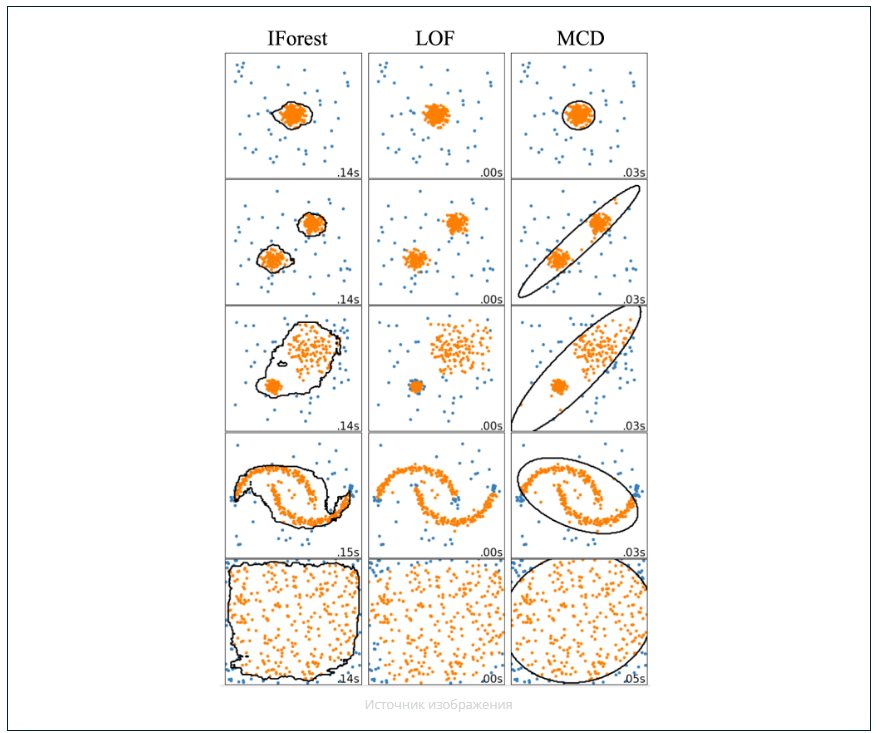

# 5. Масштабирование признаков

✍ Часто встречаются наборы данных, в которых разные столбцы имеют разные единицы измерения: например, один столбец может быть в килограммах, а другой — в сантиметрах. Кроме того, у нас могут быть такие столбцы, как price, который может варьироваться от 1 до 300 000 и даже больше, в то время как столбец weather изменяется от 29 до 71 (максимум). Таким образом, price примерно в 4000 раз больше, чем weather.

Но как мы можем быть уверены, что модель одинаково обрабатывает обе эти переменные? Когда мы подаём эти признаки в модель как есть, есть все шансы, что price больше повлияет на результат предсказания, например, года выпуска автомобиля, из-за большего значения параметра цены. Но это не обязательно означает, что данный параметр более важен как предиктор. Итак, чтобы придать значение как price, так и weather, нужно масштабирование признаков.

Вы уже знакомы со стандартным скейлером StandardScaler, MinMax и RobustScaler (см. EDA-3.6. «Преобразование признаков. Нормализация. Стандартизация»).

https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DSPR-2.0+14JULY2021/jump_to_id/e8cba6a46c1044ad82f0ba2f7cb13ecb

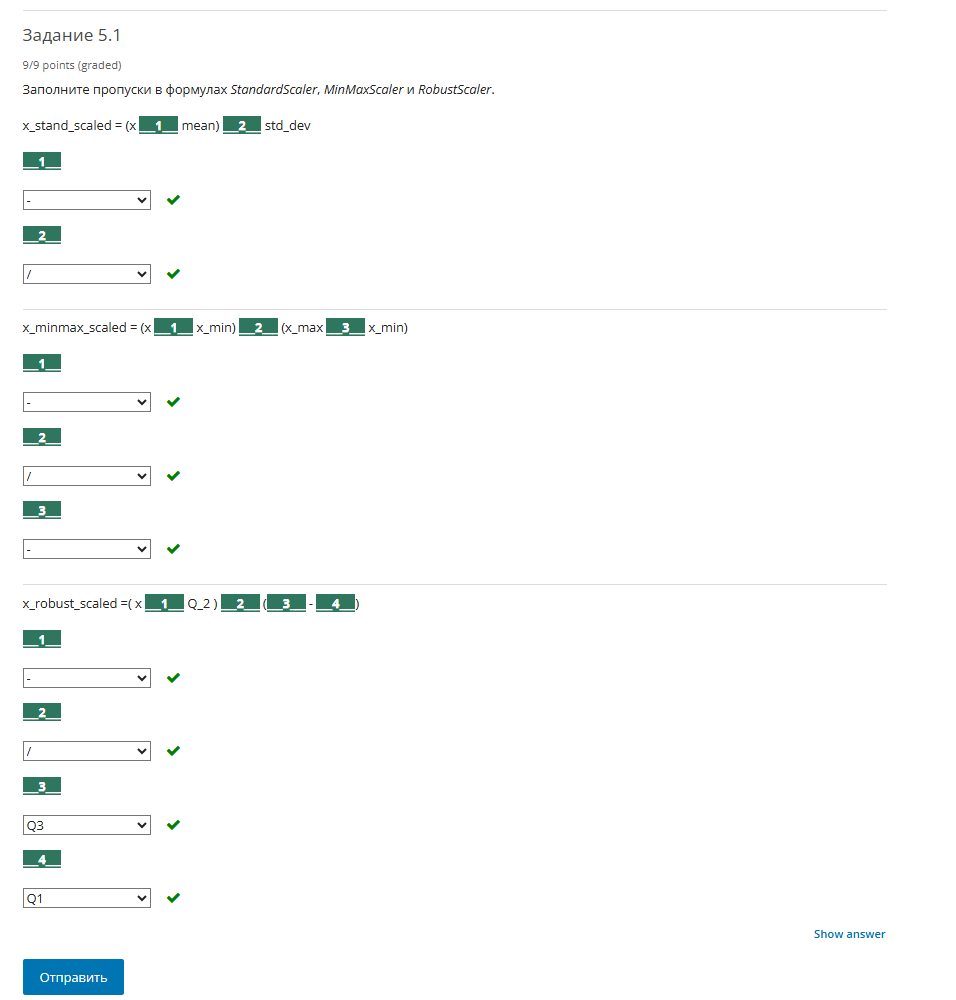

Давайте посмотрим, как StandardScaler, MinMax и RobustScaler справятся с нашими данными. Для наглядности будем использовать три столбца.

In [123]:
data = pd.read_excel('data/data_ford_price.xlsx') 
data.head()

data = data[['price', 'year', 'weather']]
data.dropna(inplace = True)
data_scaled = data.copy()
col_names = ['price', 'weather']
x = data_scaled[col_names]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
data_scaled[col_names] = scaler.fit_transform(x.values)
data_scaled

,price,year,weather
0,2.558728,2016,0.862068
1,0.067373,2009,-0.017965
2,-1.072197,2002,-0.897998
3,-1.176990,2000,-0.395122
5,-0.677579,2003,-0.269403
...,...,...,...
7012,0.682100,2015,0.862068
7013,-0.767025,2005,-0.269403
7014,-0.414149,2006,0.862068
7015,-0.335138,2011,-0.646560


In [124]:
y = data_scaled['year']
x = data_scaled.drop(columns='year')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
 
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# MAE: 3.041

MAE: 3.041


После применения двух других скейлеров получится следующая таблица MAE:

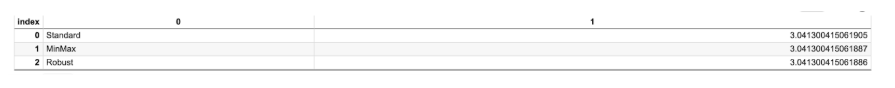

In [125]:
data = data[['price', 'year', 'weather']]
data.dropna(inplace = True)
data_scaled = data.copy()
col_names = ['price', 'weather']
x = data_scaled[col_names]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
 
data_scaled[col_names] = scaler.fit_transform(x.values)
data_scaled

,price,year,weather
0,1.982455,2016,0.571429
1,0.189460,2009,0.071429
2,-0.630672,2002,-0.428571
3,-0.706090,2000,-0.142857
5,-0.346671,2003,-0.071429
...,...,...,...
7012,0.631871,2015,0.571429
7013,-0.411044,2005,-0.071429
7014,-0.157084,2006,0.571429
7015,-0.100221,2011,-0.285714


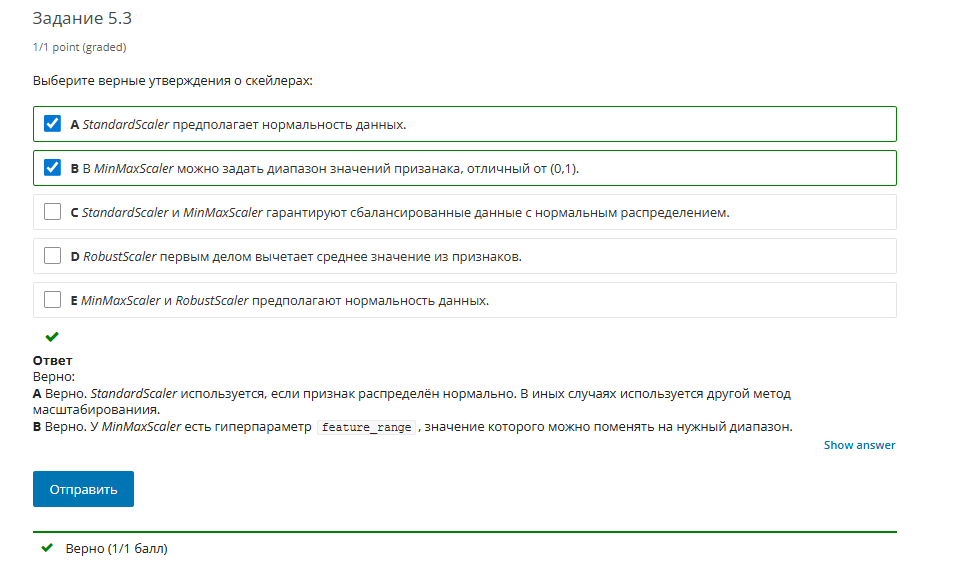

✍ Итак, мы повторили основные виды скейлеров и разобрались, чем отличаются друг от друга StandardScaler, MinMax и RobustScaler. В следующем юните вы узнаете про методы преобразования распределений признаков и примените их к нашим данным.

# 6. Трансформации распределений признаков

✍ Теперь, когда мы вспомнили популярные методы масштабирования, давайте перейдём к другим способам преобразования распределения и скейлинга признаков, доступных в мощной библиотеке sklearn.

### Quantile Transformer

Этот метод трансформации признаков преобразует распределение переменной в нормальное или равномерное распределение и масштабирует его соответствующим образом.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html

**Квантильное преобразование** сопоставляет распределение вероятностей переменной с другим распределением вероятностей с использованием квантильной функции.

**Квантильная функция**, также называемая **функцией процентной точки (PPF)**, является обратной функцией кумулятивного распределения вероятностей (CDF).

**CDF** — это функция, которая возвращает вероятность значения, равного или меньше заданного значения.

PPF является инверсией этой функции и возвращает значение с заданной вероятностью или ниже неё.

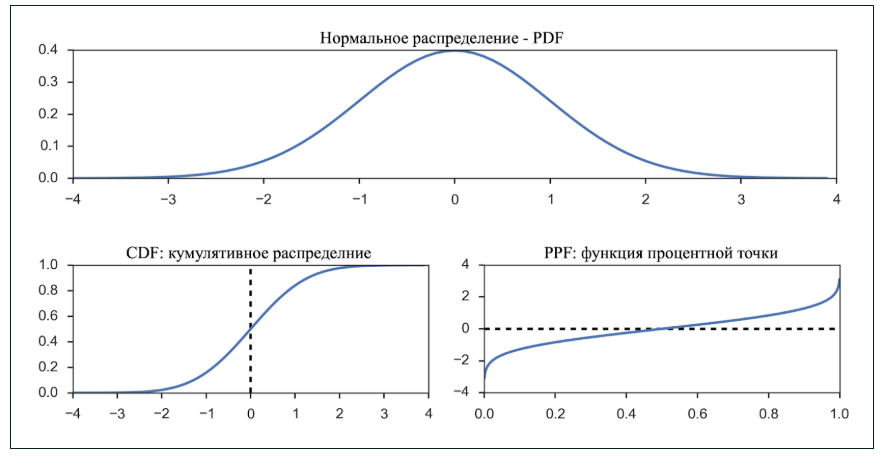

Квантильная функция ранжирует или сглаживает взаимосвязь между наблюдениями и может быть отображена на другие распределения (равномерное или нормальное).

Это квантильное преобразование доступно в библиотеке машинного обучения Python scikit-learn через класс QuantileTransformer.

У класса есть аргумент output_distribution, который отвечает за тип выходного распределения. Он может принимать значение 'uniform' (равномерное распределение) или 'normal' (нормальное распределение). По умолчанию используется равномерное распределение, то есть значение параметра равно 'uniform'.

Гиперпараметр n_quantiles определяет разрешение отображения или ранжирование наблюдений в наборе данных. Это значение должно быть меньше, чем количество наблюдений в наборе данных, и по умолчанию равно 1000.

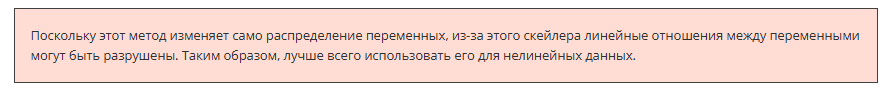

Применим данное преобразование к признаку year. Для начала посмотрим на его распределение.

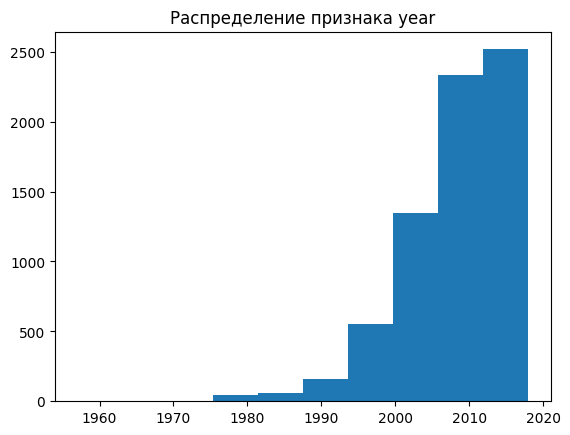

In [129]:
import matplotlib.pyplot as plt

data = pd.read_excel('data/data_ford_price.xlsx') 
data.head()

plt.hist(data.year)
plt.title('Распределение признака year');

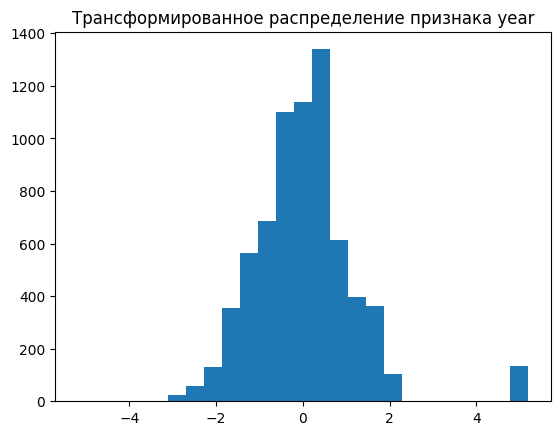

In [130]:
from sklearn.preprocessing import QuantileTransformer
# Данный трансформер принимает на вход 2D-массив, поэтому нам надо изменить формат данных (поскольку мы подаём на вход только один столбец)
data_for_transform = data['year'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

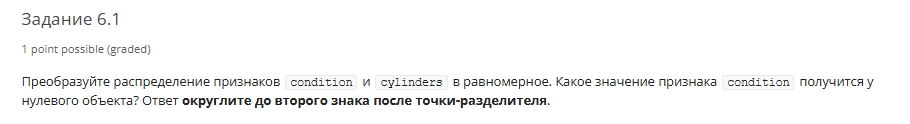

In [131]:
data_for_transform = data[['condition', 'cylinders']]
quantile = QuantileTransformer(output_distribution='uniform')
data_transformed = quantile.fit_transform(data_for_transform)
np.round(data_transformed[0][0],2)

np.float64(0.96)

### Log Transform

**Логарифмическое преобразование** — один из самых популярных методов преобразования. В основном оно используется для превращения асимметричного распределения в нормальное/менее асимметричное. В этом преобразовании мы берём логарифм значений признака вместо самих значений.

Почему это работает? Потому, что функция логарифма создана для работы с большими числами.

Посмотрим на распределение признака price. Оно асимметрично, причём значения варьируются от 0 до ~300000.

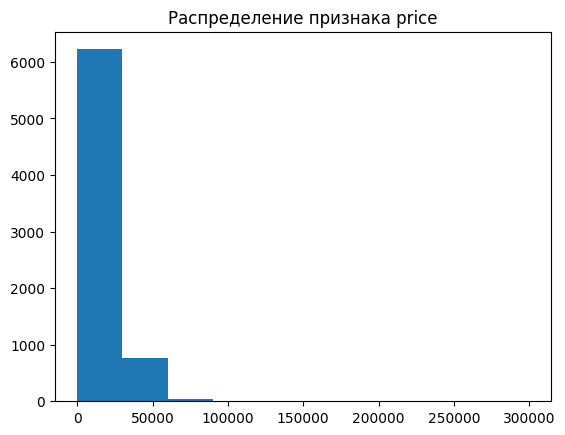

In [132]:
plt.hist(data.price)
plt.title('Распределение признака price');

Идеальный кандидат для логарифмического преобразования — применим его. На этот раз обойдёмся силами numpy.

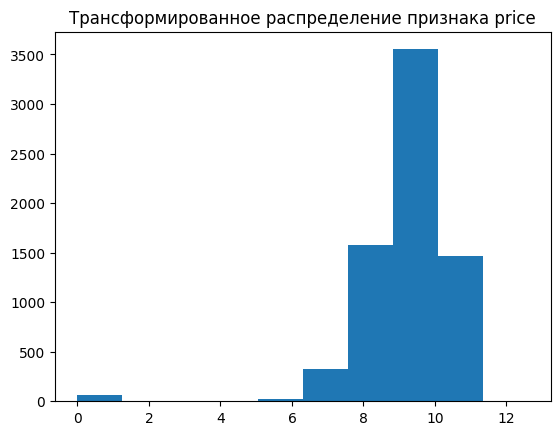

In [133]:
log_price = np.log(data['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

Давайте также сравним значения исходного и трансформированного признака.

In [134]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)
 
price_data.describe()

,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


Теперь вместо экстремального разброса значений в 1 и 299500 мы получили 0 и 12.6. Таким образом, логарифмическое преобразование сыграло роль в уменьшении влияния слишком низких и слишком высоких значений.

Стоит учесть, что, если наши данные имеют отрицательные значения или значения в диапазоне от 0 до 1, мы не можем применить логарифмическое преобразование напрямую, поскольку логарифм отрицательных чисел и 0 не определён, то есть мы получим ошибки или значения NaN в наших данных. В таких случаях мы можем добавить число к этим значениям, чтобы все они были больше 1.

In [136]:
price_data['transformed_price']

0       10.689670
1        9.647950
2        7.822044
3        7.170120
4        9.537123
          ...    
7012    10.021271
7013     8.695339
7014     9.210240
7015     9.296518
7016     9.798127
Name: transformed_price, Length: 7017, dtype: float64

### Power Transformer Scaler

Как и другие скейлеры, с которыми вы уже познакомились, Power Transformer также изменяет распределение переменной, то есть делает его более гауссовым (нормальным).

Однако чтобы использовать все изученные раннее методы трансформации и скейлинга, необходимо сначала понять исходное распределение признака, а затем уже делать выбор. Power Transformer фактически автоматизирует принятие этого решения, вводя параметр, называемый lambda. Он принимает решение об обобщённом степенном преобразовании, находя наилучшее значение  и используя один из следующих параметрических методов:

- **Преобразование Бокса-Кокса**, которое работает для положительных значений признака.
- **Преобразование Йео-Джонсона**, которое учитывает при расчётах нулевые и отрицательные значения обрабатываемых переменных.

В нашем случае мы будем использовать преобразование Бокса-Кокса, так как все значения положительны.

In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox

# Загружаем данные, если они еще не загружены
try:
    if 'data' not in locals() or data is None:
        data = pd.read_excel('data_ford_price.xlsx')
        print("Данные загружены из файла")
except:
    print("Файл не найден, используем существующие данные")

# Проверим наличие и корректность данных
if 'price' not in data.columns or 'year' not in data.columns:
    raise ValueError("В DataFrame отсутствуют колонки 'price' и 'year'")

# Проверим, есть ли отрицательные значения или нули
if (data[['price', 'year']] <= 0).any().any():
    raise ValueError("Для применения Box-Cox все значения должны быть положительными")

print(f"Форма данных: {data.shape}")
print(f"Диапазон price: {data['price'].min()} - {data['price'].max()}")
print(f"Диапазон year: {data['year'].min()} - {data['year'].max()}")

# Преобразование с помощью PowerTransformer (sklearn)
box_cox_transformer = PowerTransformer(method='box-cox')
data_box_cox_price_sklearn = box_cox_transformer.fit_transform(data[['price']])

# Преобразование с помощью scipy.stats.boxcox
# Функция boxcox возвращает кортеж (transformed_data, lambda)
data_box_cox_year_scipy, lambda_year = boxcox(data['year'])

# Создадим DataFrame с преобразованными данными
data_box_cox_price_df = pd.DataFrame(data_box_cox_price_sklearn, columns=['price_transformed_sklearn'])
data_box_cox_year_df = pd.DataFrame(data_box_cox_year_scipy, columns=['year_transformed_scipy'])

# Объединим результаты
data_box_cox = pd.concat([data_box_cox_price_df, data_box_cox_year_df], axis=1)

print(f"\nРезультаты Box-Cox преобразования:")
print(f"Лямбда для year (scipy): {lambda_year:.4f}")
print(f"Форма преобразованных данных: {data_box_cox.shape}")
print("\nПервые 5 строк преобразованных данных:")
print(data_box_cox.head())

Форма данных: (7017, 12)
Диапазон price: 1 - 299500
Диапазон year: 1957 - 2018

Результаты Box-Cox преобразования:
Лямбда для year (scipy): 92.6562
Форма преобразованных данных: (7017, 2)

Первые 5 строк преобразованных данных:
   price_transformed_sklearn  year_transformed_scipy
0                   1.910471           1.639890e+304
1                   0.270352           1.188089e+304
2                  -1.369721           8.597946e+303
3                  -1.718754           7.837449e+303
4                   0.132932           1.244153e+304


C:\Users\tgorbunov\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1153: UserWarning: The optimal lambda is 123.77781881071438, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in <class 'numpy.float64'>.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)


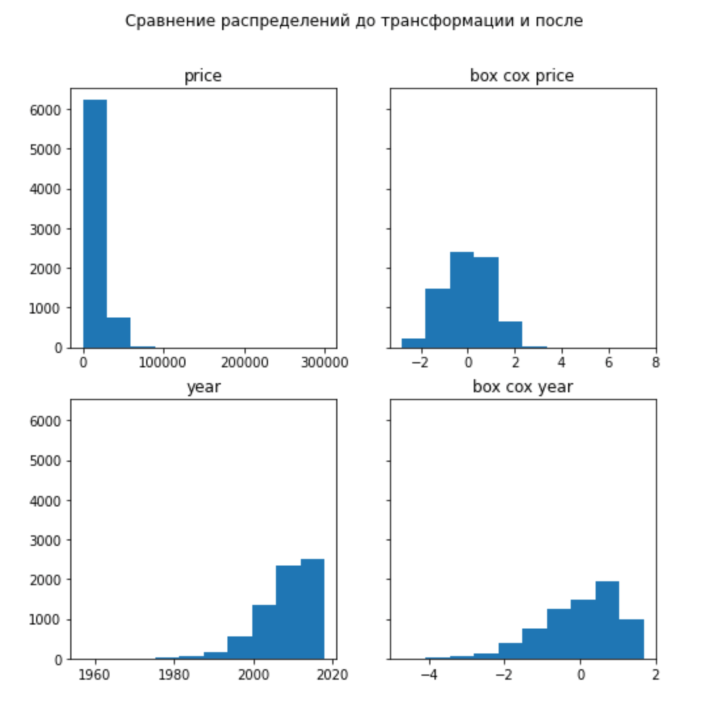

# 7. Даты и расстояния

✍ После того как данные избавлены от пропусков, закодированы и масштабированы, приходит время агрегации полезной информации из них.

В рамках блока EDA-3.4. «Создание признаков. Работа с форматом «дата-время» вы узнали о том, как с помощью двух колонок с датой и временем определять, например, продолжительность телефонного разговора.

→ Скачайте ноутбук с кодом юнита

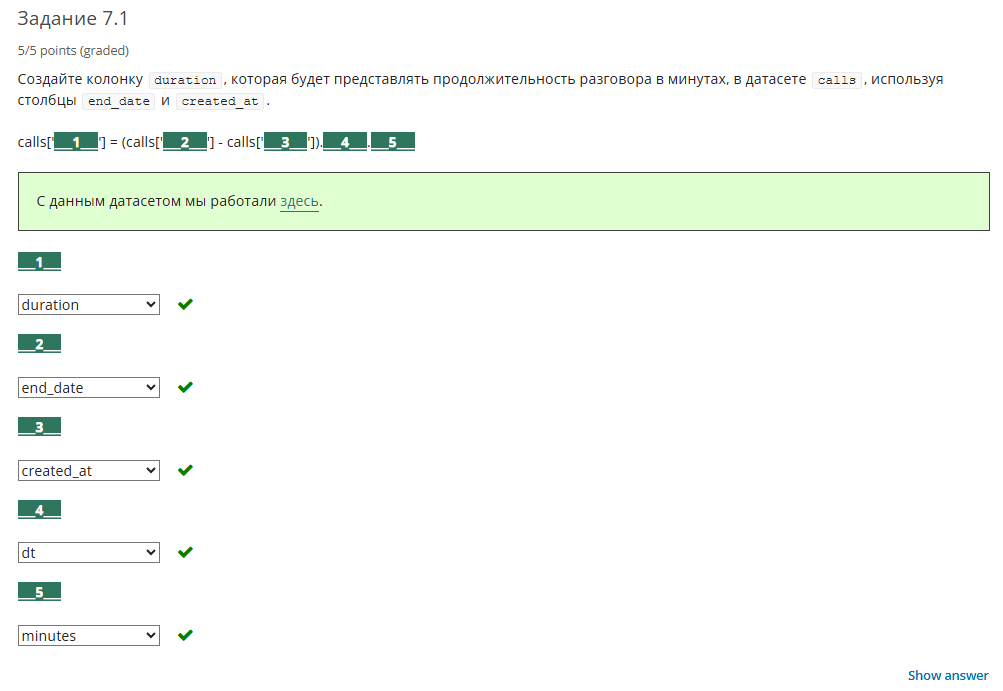

По аналогии с датой и временем можно использовать информацию в столбцах, например, широту  и долготу.

Давайте найдём конкретный адрес нулевого объекта, используя широту  и долготу. Для этого нам понадобится библиотека geopy.

In [8]:
from geopy.geocoders import Nominatim
import pandas as pd

Создаём объект Nominatim и инициализируем API Nominatim с помощью параметра geoapiExercises.

In [9]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [10]:
data = pd.read_excel('data/data_ford_price.xlsx') 
data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


Объединим широту и долготу для поиска адреса первого объекта:

In [12]:
import time

# Исправляем typo и добавляем обработку ошибок
try:
    # Правильное написание переменной
    Latitude = str(data['lat'][0])
    Longitude = str(data['long'][0])
    
    print(f"Широта: {Latitude}")
    print(f"Долгота: {Longitude}")
    
    # Добавляем небольшую задержку для уважения к API
    time.sleep(1)
    
    # Создаем новый geolocator с более подробными настройками
    geolocator = Nominatim(
        user_agent="ML-6_geocoding_tutorial_v1.0",
        timeout=10
    )
    
    location = geolocator.reverse(Latitude + "," + Longitude)
    
    if location:
        print(f"Найденный адрес: {location}")
        print(f"Подробная информация: {location.raw}")
    else:
        print("Адрес не найден для данных координат")
        
except Exception as e:
    print(f"Ошибка при геокодировании: {e}")
    print("\nЭто может происходить по следующим причинам:")
    print("1. Превышен лимит запросов к Nominatim API")
    print("2. Проблемы с интернет-соединением")
    print("3. Некорректные координаты")
    print("\nПопробуйте:")
    print("- Подождать несколько минут перед повторным запросом")
    print("- Проверить интернет-соединение")
    print("- Использовать другой сервис геокодирования")
    
    # Выводим координаты для ручной проверки
    print(f"\nВы можете проверить координаты вручную:")
    print(f"Широта: {data['lat'][0]}")
    print(f"Долгота: {data['long'][0]}")
    print(f"Google Maps: https://maps.google.com/?q={data['lat'][0]},{data['long'][0]}")

Широта: 36.4715
Долгота: -82.4834
Найденный адрес: Fort Henry Drive, Kingsport, Sullivan County, East Tennessee, Tennessee, 37663, United States
Подробная информация: {'place_id': 403322693, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'way', 'osm_id': 111056101, 'lat': '36.4708081', 'lon': '-82.4844405', 'class': 'highway', 'type': 'primary', 'place_rank': 26, 'importance': 0.053374048218509156, 'addresstype': 'road', 'name': 'Fort Henry Drive', 'display_name': 'Fort Henry Drive, Kingsport, Sullivan County, East Tennessee, Tennessee, 37663, United States', 'address': {'road': 'Fort Henry Drive', 'city': 'Kingsport', 'county': 'Sullivan County', 'region': 'East Tennessee', 'state': 'Tennessee', 'ISO3166-2-lvl4': 'US-TN', 'postcode': '37663', 'country': 'United States', 'country_code': 'us'}, 'boundingbox': ['36.4431030', '36.4733840', '-82.4877113', '-82.4578670']}
Найденный адрес: Fort Henry Drive, Kingsport, Sullivan County, East Ten

In [13]:
# Альтернативный подход: Создание признаков из координат без геокодирования
print("=== Альтернативные способы работы с координатами ===")

# 1. Расстояние от центра города (например, от центра Москвы)
center_lat, center_lon = 55.7558, 37.6176  # Координаты центра Москвы

def calculate_distance(lat1, lon1, lat2, lon2):
    """Вычисляет расстояние между двумя точками по формуле гаверсинуса"""
    from math import radians, cos, sin, asin, sqrt
    
    # Переводим в радианы
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Формула гаверсинуса
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Радиус Земли в километрах
    return c * r

# Вычисляем расстояние до центра для первого объекта
if 'lat' in data.columns and 'long' in data.columns:
    distance_to_center = calculate_distance(
        data['lat'][0], data['long'][0], 
        center_lat, center_lon
    )
    print(f"Расстояние от центра Москвы: {distance_to_center:.2f} км")

# 2. Создание категориальных признаков на основе координат
def get_region_by_coordinates(lat, lon):
    """Упрощенное определение региона по координатам"""
    if 55.5 <= lat <= 56.0 and 37.0 <= lon <= 38.0:
        return "Центральный"
    elif 55.0 <= lat <= 55.5:
        return "Южный"
    elif 56.0 <= lat <= 56.5:
        return "Северный"
    else:
        return "Другой"

if 'lat' in data.columns and 'long' in data.columns:
    region = get_region_by_coordinates(data['lat'][0], data['long'][0])
    print(f"Предполагаемый регион: {region}")

print("\n=== Практические применения ===")
print("1. Расстояние до центра города (может влиять на цену)")
print("2. Региональная категоризация")
print("3. Плотность объектов в радиусе N км")
print("4. Близость к транспортным узлам")

=== Альтернативные способы работы с координатами ===
Расстояние от центра Москвы: 8302.58 км
Предполагаемый регион: Другой

=== Практические применения ===
1. Расстояние до центра города (может влиять на цену)
2. Региональная категоризация
3. Плотность объектов в радиусе N км
4. Близость к транспортным узлам


### Решение проблемы с геокодированием

**Проблема**: Ошибка 403 (GeocoderInsufficientPrivileges) при использовании Nominatim API.

**Причины**:
1. **Превышение лимита запросов** - Nominatim имеет ограничения на количество запросов
2. **Отсутствие User-Agent** - некоторые сервисы требуют корректный User-Agent
3. **Слишком частые запросы** - нужны паузы между запросами

**Решения**:
1. **Добавить задержки** между запросами (`time.sleep()`)
2. **Использовать корректный User-Agent**
3. **Обработка ошибок** с информативными сообщениями
4. **Альтернативные подходы** - создание признаков без геокодирования

**Лучшие практики для геокодирования**:
- Не делать более 1 запроса в секунду
- Использовать осмысленный User-Agent
- Кешировать результаты для повторных запросов
- Иметь план Б (альтернативные сервисы или подходы)

In [15]:
Latitude = str(data['lat'][0])
Longitude =  str(data['long'][0])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

Fort Henry Drive, Kingsport, Sullivan County, East Tennessee, Tennessee, 37663, United States


Теперь получим информацию из данного списка и преобразуем её в словарь с помощью функции raw():

In [14]:
address = location.raw['address']
address

{'road': 'Fort Henry Drive',
 'city': 'Kingsport',
 'county': 'Sullivan County',
 'region': 'East Tennessee',
 'state': 'Tennessee',
 'ISO3166-2-lvl4': 'US-TN',
 'postcode': '37663',
 'country': 'United States',
 'country_code': 'us'}

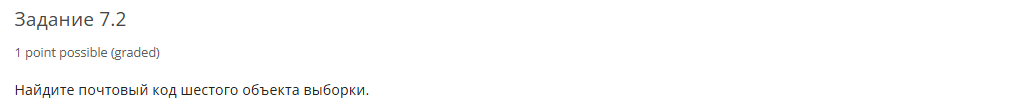

In [16]:
Latitude = str(data['lat'][5])
Longitude =  str(data['long'][5])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

E and J Motors, 622, Southeast 82nd Avenue, Montavilla, Portland, Multnomah County, Oregon, 97216, United States


**БОНУС**

С помощью библиотек **geopandas и shapely** можно визуализировать географические данные. Это значит, что мы можем увидеть расположение наших объектов (автомобилей) на карте мира.

Установим данные библиотеки:

In [19]:
#%pip install geopandas
#%pip install shapely

Отметим расположение объектов нашей выборки зелёным цветом.

Данные загружены для визуализации
Найдено 7017 записей с координатами
Диапазон широты: -2.5088 - 77.6177
Диапазон долготы: -151.0558 - -5.3780
Использую geodatasets для карты мира
Использую geodatasets для карты мира


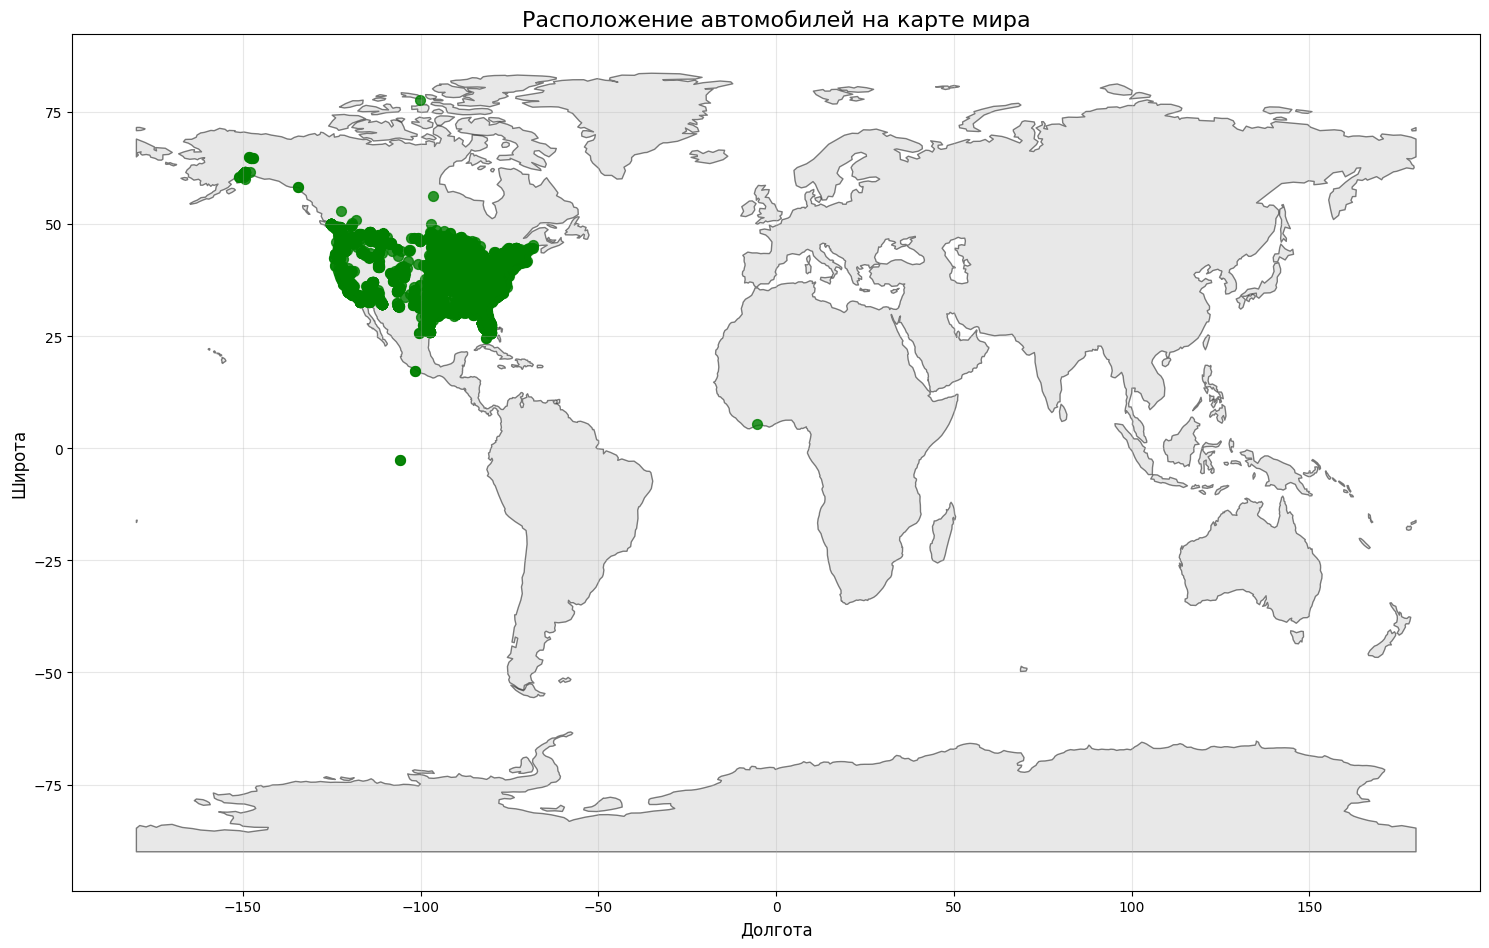


Статистика по координатам:
Количество уникальных местоположений: 3061

Пример координат:
Автомобиль 1: широта 36.4715, долгота -82.4834
Автомобиль 2: широта 40.4688, долгота -74.2817
Автомобиль 3: широта 42.4771, долгота -82.9496
Автомобиль 4: широта 40.7644, долгота -82.3495
Автомобиль 5: широта 49.2109, долгота -123.1147


In [1]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import pandas as pd

# Сначала убедимся, что данные загружены
try:
    if 'data' not in locals() or data is None:
        data = pd.read_excel('data_ford_price.xlsx')
        print("Данные загружены для визуализации")
except:
    print("Не удалось загрузить данные. Убедитесь, что файл существует.")

# Проверим наличие необходимых столбцов
if 'lat' in data.columns and 'long' in data.columns:
    print(f"Найдено {len(data)} записей с координатами")
    print(f"Диапазон широты: {data['lat'].min():.4f} - {data['lat'].max():.4f}")
    print(f"Диапазон долготы: {data['long'].min():.4f} - {data['long'].max():.4f}")
    
    # Создаем геометрические объекты Point
    geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
    gdf = GeoDataFrame(data, geometry=geometry, crs='EPSG:4326')  
    
    # Пытаемся загрузить карту мира разными способами
    try:
        # Способ 1: Попробуем использовать geodatasets
        try:
            import geodatasets
            world = gpd.read_file(geodatasets.get_path('naturalearth.land'))
            print("Использую geodatasets для карты мира")
        except ImportError:
            print("geodatasets не установлен, пробую альтернативный способ...")
            raise Exception("Пробуем другой способ")
    except:
        # Способ 2: Создаем простую карту мира без внешних данных
        print("Создаю упрощенную визуализацию без карты мира...")
        world = None
    
    # Создаем график
    fig, ax = plt.subplots(figsize=(15, 10))
    
    if world is not None:
        # Если удалось загрузить карту мира
        world.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)
        
        # Добавляем точки автомобилей
        gdf.plot(ax=ax, marker='o', color='green', markersize=50, alpha=0.8)
        
        plt.title('Расположение автомобилей на карте мира', fontsize=16)
    else:
        # Если карта мира недоступна, показываем только точки
        gdf.plot(ax=ax, marker='o', color='green', markersize=100, alpha=0.8)
        
        # Добавляем фон
        ax.set_facecolor('lightblue')
        plt.title('Расположение автомобилей (координаты)', fontsize=16)
    
    plt.xlabel('Долгота', fontsize=12)
    plt.ylabel('Широта', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Улучшаем отображение
    plt.tight_layout()
    plt.show()
    
    # Дополнительная статистика
    print(f"\nСтатистика по координатам:")
    print(f"Количество уникальных местоположений: {len(gdf.geometry.unique())}")
    
    # Показываем несколько примеров координат
    print(f"\nПример координат:")
    for i in range(min(5, len(data))):
        print(f"Автомобиль {i+1}: широта {data['lat'].iloc[i]:.4f}, долгота {data['long'].iloc[i]:.4f}")
    
else:
    print("В данных отсутствуют столбцы 'lat' и 'long' для визуализации")
    if 'data' in locals():
        print("Доступные столбцы:", data.columns.tolist())
    else:
        print("Данные не загружены")

### Решение проблемы с geopandas.datasets

**Проблема**: В GeoPandas 1.0+ модуль `datasets` был удален, что вызывает ошибку `AttributeError`.

**Решение**: Используем современные альтернативы:
1. **geodatasets** - новый пакет для образцов географических данных
2. **Fallback визуализация** - простое отображение координат без карты мира

**Обновленный код** включает:
- Автоматическую загрузку данных
- Попытку использования современных источников карт
- Fallback-режим для простой визуализации
- Детальную статистику по координатам

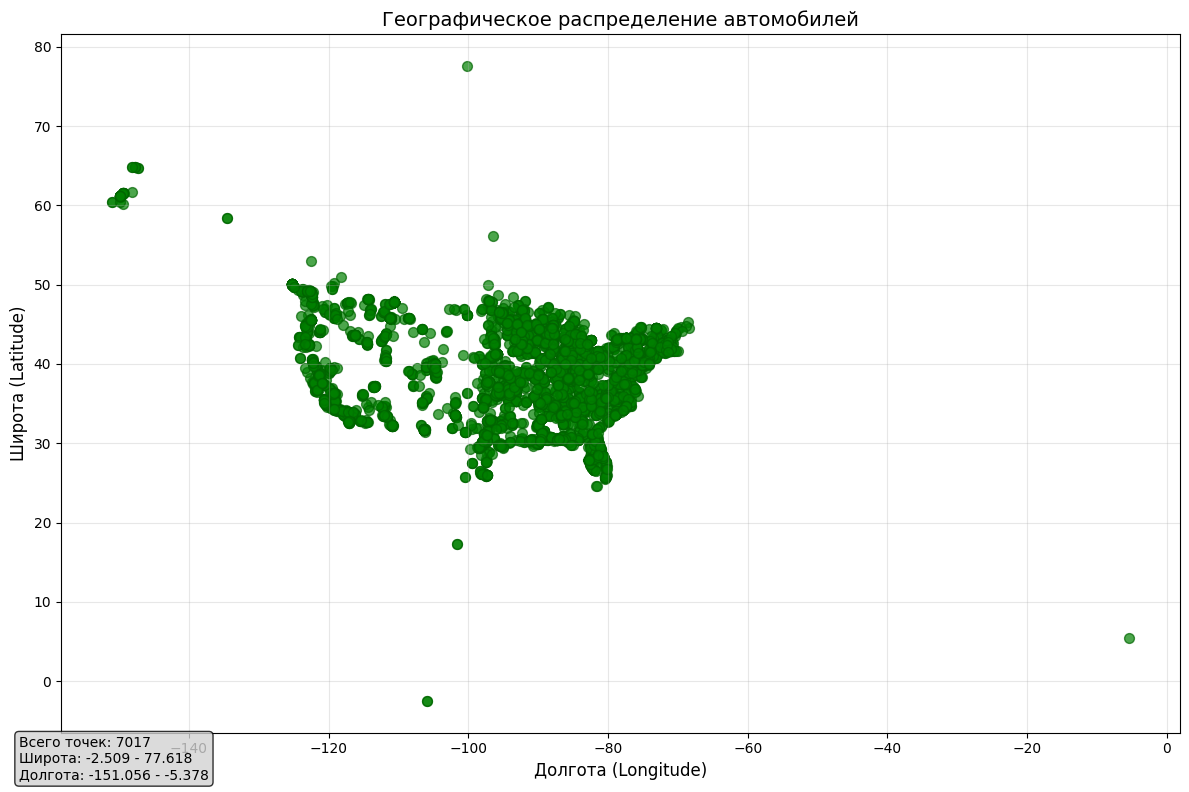

=== Анализ географического распределения ===
Количество записей: 7017
Центральная точка: широта 39.5501, долгота -91.9034
Диапазон широты: 80.1265°
Диапазон долготы: 145.6778°


In [2]:
# Альтернативная простая визуализация координат без зависимостей
import matplotlib.pyplot as plt
import pandas as pd

# Загружаем данные
try:
    if 'data' not in locals():
        data = pd.read_excel('data_ford_price.xlsx')
    
    if 'lat' in data.columns and 'long' in data.columns:
        # Создаем простую scatter plot
        plt.figure(figsize=(12, 8))
        
        # Основной scatter plot
        plt.scatter(data['long'], data['lat'], 
                   c='green', s=50, alpha=0.7, edgecolors='darkgreen')
        
        # Настройка осей и заголовков
        plt.xlabel('Долгота (Longitude)', fontsize=12)
        plt.ylabel('Широта (Latitude)', fontsize=12)
        plt.title('Географическое распределение автомобилей', fontsize=14)
        
        # Добавляем сетку
        plt.grid(True, alpha=0.3)
        
        # Показываем статистику
        plt.figtext(0.02, 0.02, 
                   f'Всего точек: {len(data)}\n'
                   f'Широта: {data["lat"].min():.3f} - {data["lat"].max():.3f}\n'
                   f'Долгота: {data["long"].min():.3f} - {data["long"].max():.3f}',
                   fontsize=10, 
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8))
        
        plt.tight_layout()
        plt.show()
        
        # Выводим дополнительную информацию
        print("=== Анализ географического распределения ===")
        print(f"Количество записей: {len(data)}")
        print(f"Центральная точка: широта {data['lat'].mean():.4f}, долгота {data['long'].mean():.4f}")
        print(f"Диапазон широты: {data['lat'].max() - data['lat'].min():.4f}°")
        print(f"Диапазон долготы: {data['long'].max() - data['long'].min():.4f}°")
        
    else:
        print("Столбцы 'lat' и 'long' не найдены в данных")
        
except Exception as e:
    print(f"Ошибка при создании визуализации: {e}")
    print("Убедитесь, что файл data_ford_price.xlsx существует")

С помощью Plotly мы можем построить интерактивную карту и отследить изменение цены автомобиля в зависимости от его локации:

In [3]:
import plotly.express as px
import pandas as pd
 
fig = px.scatter_geo(data,lat='lat',lon='long', hover_name="price")
fig.update_layout(title = 'Интерактивная карта цены автомобиля в зависимости от локации', title_x=1)
fig.show()

# 8. Отбор признаков: мотивация

**Отбор признаков** — это процесс выбора важных признаков, оказывающих наибольшее влияние на предсказание.

https://apps.skillfactory.ru/learning/course/course-v1:SkillFactory+DSPR-2.0+14JULY2021/block-v1:SkillFactory+DSPR-2.0+14JULY2021+type@sequential+block@d20b06b382494369b01d0b71187d7424/block-v1:SkillFactory+DSPR-2.0+14JULY2021+type@vertical+block@68496461c02343d0a7b1fd901edd40bc

Давайте оценим влияние мультиколлинеарности на линейную регрессию:

In [6]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [7]:
data = pd.read_excel('data/data_ford_price.xlsx') 

data = data[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace = True)
y = data['price']
x = data.drop(columns='price')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# MAE: 4682.957


MAE: 4856.318


Мы выяснили, что у нас присутствует сильная зависимость между lat и weather. Удалим lat, так как этот признак, в отличие от weather, необходимо округлять.

In [8]:
x.drop('lat', axis = 1, inplace = True)

# MAE: 4672.930

✍ Итак, мы вспомнили о понятии мультиколлинеарности и о его влиянии на отбор признаков. В следующем юните мы разберём автоматические методы отбора признаков, влияющих на качество моделирования.

# 9. Отбор признаков: классификация методов

Методы отбора признаков предназначены для уменьшения количества входных переменных до тех значений, которые наиболее полезны для предсказательной способности модели.

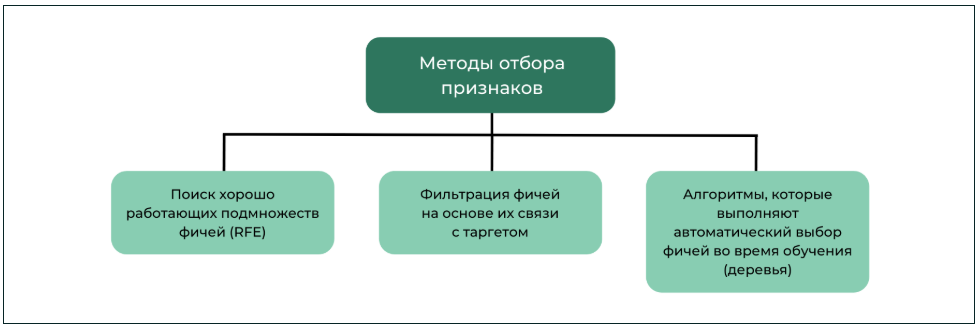

### RFE

**Метод рекурсивного исключения признаков (RFE)** предполагает выбор признаков путём рекурсивного рассмотрения всё меньших и меньших наборов фичей.

Сначала RFE обучается на изначальной выборке, и происходит оценка важности каждого признака. Затем наименее важные фичи удаляются. Эта процедура рекурсивно повторяется на сокращённом наборе до тех пор, пока в конечном итоге не будет достигнуто желаемое количество признаков в выборке.

Выделим три наиболее значимых признака:

In [9]:
from sklearn.feature_selection import RFE
 
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'lat'], dtype=object)

Также узнаем, как RFE проранжировал все доступные признаки:



In [10]:
X_train.columns

Index(['year', 'cylinders', 'odometer', 'lat', 'long', 'weather'], dtype='object')

In [11]:
selector.ranking_

array([1, 1, 4, 1, 3, 2])

### МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ

В качестве фильтров для выбора признаков используются уже знакомые нам статистики, такие как коэффициент корреляции Пирсона, ANOVA и т. д. При этом выбор статистических показателей сильно зависит от типов переменных в данных.

Чем больше известно о типе данных, тем проще выбрать подходящую статистическую меру для метода отбора признаков на основе фильтра. Ниже приведена схема-помощник в выборе метода селекции признаков.

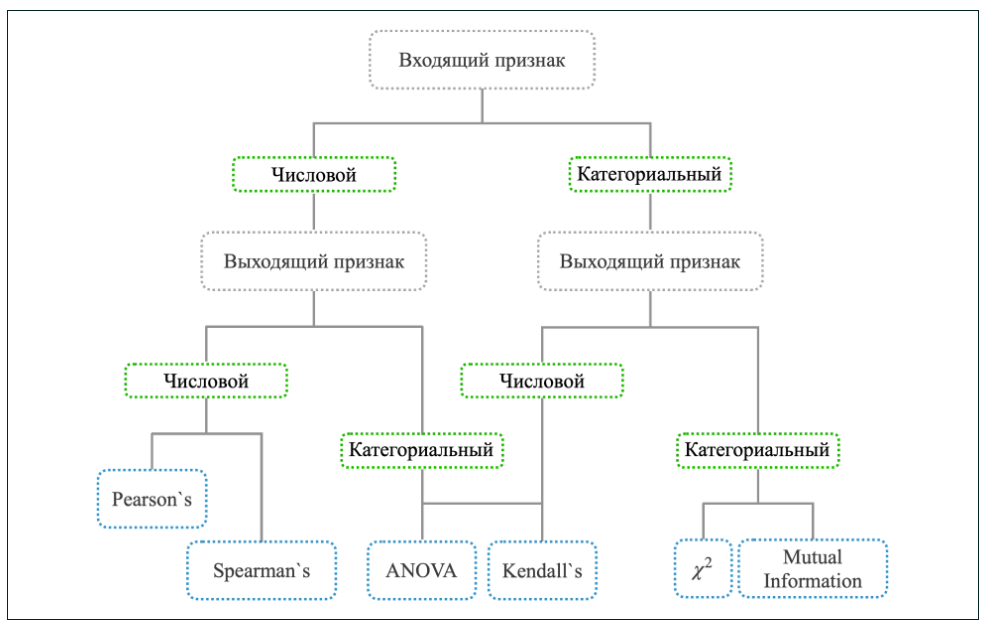

Библиотека sklearn обеспечивает реализацию большинства полезных статистических показателей, например:

- коэффициента корреляции Пирсона: f_regression(); https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html
- дисперсионного анализа ANOVA: f_classif(); https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html
- хи-квадрата: chi2(); https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
- взаимной информации: mutual_info_classif() и mutual_info_regression(). https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html

Кроме того, библиотека SciPy обеспечивает реализацию многих других статистических данных, таких как:
- **тау Кендалла (kendalltau)**
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html

- ранговая корреляция **Спирмена (spearmanr)**
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

sklearn также предоставляет множество различных методов фильтрации после расчёта статистики для каждой входной переменной с целевой.

Два наиболее популярных метода:

- выбор k лучших переменных: SelectKBest
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

- выбор переменных верхнего процентиля: SelectPercentile
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html

In [13]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'odometer'], dtype=object)

На этот раз odometer оказался в топе.

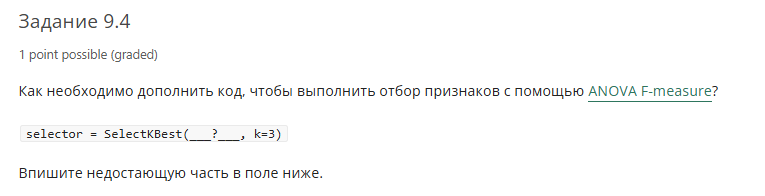

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=3)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'odometer'], dtype=object)

✍ Итак, методы выбора признаков на основе фильтров используют статистические показатели для оценки корреляции или зависимости между входными переменными, которые можно отфильтровать, чтобы выбрать наиболее релевантные признаки.

Статистические меры для селекции признаков должны быть тщательно отобраны на основе типа данных входной и выходной переменной.

# 10. Практика

✍ Поздравляем! Вы проделали большой путь и теперь знаете, из каких этапов состоит предварительная обработка данных, и умеете применять их на практике.

Давайте закрепим материал разбором нового кейса ↓

Нам предлагается ответить на вопрос, будет ли доход конкретного человека превышать 50 000$.

Мы будем использовать данные переписи населения США в 1994 году.

Выборка содержит 32 561 наблюдение и 13 переменных, одна из которых — целевая (income). Все объекты были предварительно распределены на обучающую и тестовую части размерами 24420 и 8141 соответственно.

### **выполнено в:** -> ML-6._r_Предсказание_дохода.ipynb